# Loan Data from Prosper

**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

**Read data**

In [2]:
all_data = pd.read_csv('prosperLoanData.csv')

**Exploring the data**

In [3]:
all_data.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [4]:
all_data.shape

(113937, 81)

[Dataset Description](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
all_data.duplicated().value_counts()

False    113937
dtype: int64

### What is the structure of your dataset?
This dataset contains `113,937 rows` and `81 columns`.
each row has information on the borrow's APR, status, borrowed amount, debt, etc. 
Variables with many missing values will be dropped to make the Dataset more accurate. 
Outliers were also will be removed to provide more reliable Data.


### What is/are the main feature(s) of interest in your dataset?

Im most interested in figuring out what features are best for predicting the price of the diamonds in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that carat will have the strongest effect on each diamonds price: the larger the diamond, the higher the price. I also think that the other big "C"s of diamonds: cut, color, and clarity, will have effects on the price, though to a much smaller degree than the main effect of carat.

**Selecting 17 features for visualization:**

In [7]:
data = all_data[['LoanKey','Term','LoanStatus','BorrowerAPR','BorrowerRate',
             'ListingCategory (numeric)','BorrowerState','Occupation',
             'EmploymentStatus','LoanOriginalAmount','CreditScoreRangeLower',
             'CreditScoreRangeUpper','DebtToIncomeRatio','Investors','StatedMonthlyIncome',
             'MonthlyLoanPayment','IncomeVerifiable']]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
LoanKey                      113937 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
LoanOriginalAmount           113937 non-null int64
CreditScoreRangeLower        113346 non-null float64
CreditScoreRangeUpper        113346 non-null float64
DebtToIncomeRatio            105383 non-null float64
Investors                    113937 non-null int64
StatedMonthlyIncome          113937 non-null float64
MonthlyLoanPayment           113937 non-null float64
IncomeVerifiable             113937 non-null bool
dtyp

**Removing duplicate data**

In [9]:
data.duplicated().value_counts()

False    113066
True        871
dtype: int64

In [10]:
final_data = data.drop_duplicates()

In [11]:
final_data.duplicated().value_counts()

False    113066
dtype: int64

In [12]:
final_data.isnull().sum()

LoanKey                         0
Term                            0
LoanStatus                      0
BorrowerAPR                    25
BorrowerRate                    0
ListingCategory (numeric)       0
BorrowerState                5515
Occupation                   3529
EmploymentStatus             2255
LoanOriginalAmount              0
CreditScoreRangeLower         591
CreditScoreRangeUpper         591
DebtToIncomeRatio            8472
Investors                       0
StatedMonthlyIncome             0
MonthlyLoanPayment              0
IncomeVerifiable                0
dtype: int64

**Removing null data**

In [13]:
final_data = final_data.dropna()

In [14]:
final_data.isna().sum()

LoanKey                      0
Term                         0
LoanStatus                   0
BorrowerAPR                  0
BorrowerRate                 0
ListingCategory (numeric)    0
BorrowerState                0
Occupation                   0
EmploymentStatus             0
LoanOriginalAmount           0
CreditScoreRangeLower        0
CreditScoreRangeUpper        0
DebtToIncomeRatio            0
Investors                    0
StatedMonthlyIncome          0
MonthlyLoanPayment           0
IncomeVerifiable             0
dtype: int64

In [15]:
final_data.shape

(97022, 17)

In [16]:
final_data.head()

LoanKey  Term LoanStatus  BorrowerAPR  BorrowerRate  \
0  E33A3400205839220442E84    36  Completed      0.16516        0.1580   
1  9E3B37071505919926B1D82    36    Current      0.12016        0.0920   
2  6954337960046817851BCB2    36  Completed      0.28269        0.2750   
3  A0393664465886295619C51    36    Current      0.12528        0.0974   
4  A180369302188889200689E    36    Current      0.24614        0.2085   

   ListingCategory (numeric) BorrowerState     Occupation EmploymentStatus  \
0                          0            CO          Other    Self-employed   
1                          2            CO   Professional         Employed   
2                          0            GA          Other    Not available   
3                         16            GA  Skilled Labor         Employed   
4                          2            MN      Executive         Employed   

   LoanOriginalAmount  CreditScoreRangeLower  CreditScoreRangeUpper  \
0                9425                  640.0                  659.0   
1               10000                  680.0                  699.0   
2                3001                  480.0                  499.0   
3               10000                  800.0                  819.0   
4               15000                  680.0                  699.0   

   DebtToIncomeRatio  Investors  StatedMonthlyIncome  MonthlyLoanPayment  \
0               0.17        258          3083.333333              330.43   
1               0.18          1          6125.000000              318.93   
2               0.06         41          2083.333333              123.32   
3               0.15        158          2875.000000              321.45   
4               0.26         20          9583.333333              563.97   

   IncomeVerifiable  
0              True  
1              True  
2              True  
3              True  
4              True

In [17]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97022 entries, 0 to 113936
Data columns (total 17 columns):
LoanKey                      97022 non-null object
Term                         97022 non-null int64
LoanStatus                   97022 non-null object
BorrowerAPR                  97022 non-null float64
BorrowerRate                 97022 non-null float64
ListingCategory (numeric)    97022 non-null int64
BorrowerState                97022 non-null object
Occupation                   97022 non-null object
EmploymentStatus             97022 non-null object
LoanOriginalAmount           97022 non-null int64
CreditScoreRangeLower        97022 non-null float64
CreditScoreRangeUpper        97022 non-null float64
DebtToIncomeRatio            97022 non-null float64
Investors                    97022 non-null int64
StatedMonthlyIncome          97022 non-null float64
MonthlyLoanPayment           97022 non-null float64
IncomeVerifiable             97022 non-null bool
dtypes: bool(1), float

### Structure of my final dataset

Number of rows in dataset are **97022** and Number of Columns in dataset are **17**.<br>


## Univariate Exploration

### First variable "Term"

In [18]:
final_data['Term'].value_counts()

36    73003
60    22604
12     1415
Name: Term, dtype: int64

In [19]:
final_data['Term'].value_counts().values[0]

73003

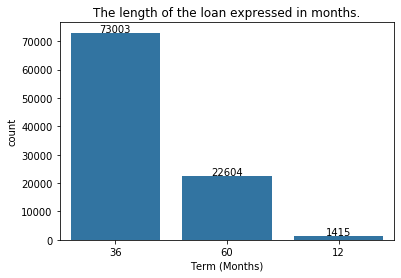

In [20]:
sns.countplot(x = 'Term',data = final_data,
              color = sns.color_palette()[0],order = final_data['Term'].value_counts().index)
plt.xlabel('Term (Months)')

# Adding counts of each term in our data on top of of each bar.
for i in range (final_data['Term'].value_counts().shape[0]):
    count = final_data['Term'].value_counts().values[i]
    plt.text(i, count + 3000, count, ha = 'center', va = 'top')
plt.title('The length of the loan expressed in months.');

we can say that the length of the loan (in months) is **maximum** for **36 months** and **minimum** for **12 months.** 

### Second variable "Borrower Rate"

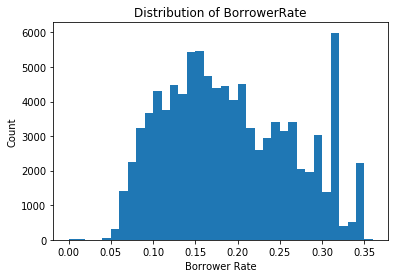

In [21]:
# Plotting histogram.
bins = np.arange(0, final_data['BorrowerRate'].max()+0.01,0.01) 
plt.hist(x = 'BorrowerRate', data = final_data, bins = bins)
plt.title('Distribution of BorrowerRate')
plt.xlabel('Borrower Rate')
plt.ylabel('Count');

It is a bimodal distribution with one peak lying between **0.15 and 0.17** and another peak lying between **0.30 and 0.33**.<br>
It is a **right-skewed** distribution. <br>
After **0.16 rate** there is a **decrease** in the count but between **0.32 and 0.34** there is a sudden **increase** in the count of borrower rate.

### Third variable "Loan Status"

In [22]:
final_data['LoanStatus'].value_counts()

Current                   50466
Completed                 31074
Chargedoff                 9613
Defaulted                  3848
Past Due (1-15 days)        709
Past Due (31-60 days)       320
Past Due (91-120 days)      277
Past Due (61-90 days)       274
Past Due (16-30 days)       241
FinalPaymentInProgress      185
Past Due (>120 days)         14
Cancelled                     1
Name: LoanStatus, dtype: int64

Text(0.5, 1.0, 'Displaying counts for each loan status')

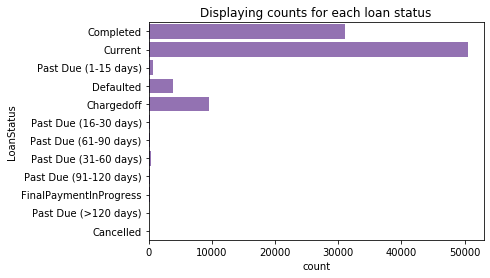

In [23]:
sns.countplot(y = 'LoanStatus',data = final_data, 
              color = sns.color_palette()[4])
plt.title('Displaying counts for each loan status')

Loan status **"Current"** has the most number of counts<br> 
Loan status **"Completed"** have second most number of counts.

### Fourth variable "Listing Category"

**Category names for each numerical value**

In [24]:
list_cat={0:'Not Available',1:'Debt Consolidation',2:'Home Improvement',
          3:'Business',4:'Personal Loan',5:'Student Use',6:'Auto',
          7:'Other',8:'Baby&Adoption',9:'Boat',10:'Cosmetic Procedure',
          11:'Engagement Ring',12:'Green Loans',13:'Household Expenses',
          14:'Large Purchases',15:'Medical/Dental',16:'Motorcycle',
          17:'RV',18:'Taxes',19:'Vacation',20:'Wedding Loans'}

In [25]:
l=[]
for i in range(final_data.shape[0]):
    for j in range(len(list_cat)):
        if final_data['ListingCategory (numeric)'].values[i] == list(list_cat.keys())[j]:
            l.append(list(list_cat.values())[j])

**Assigning a new column with listing labels.**

In [26]:
final_data['ListingLabels'] = l

In [27]:
final_data.head(5)

LoanKey  Term LoanStatus  BorrowerAPR  BorrowerRate  \
0  E33A3400205839220442E84    36  Completed      0.16516        0.1580   
1  9E3B37071505919926B1D82    36    Current      0.12016        0.0920   
2  6954337960046817851BCB2    36  Completed      0.28269        0.2750   
3  A0393664465886295619C51    36    Current      0.12528        0.0974   
4  A180369302188889200689E    36    Current      0.24614        0.2085   

   ListingCategory (numeric) BorrowerState     Occupation EmploymentStatus  \
0                          0            CO          Other    Self-employed   
1                          2            CO   Professional         Employed   
2                          0            GA          Other    Not available   
3                         16            GA  Skilled Labor         Employed   
4                          2            MN      Executive         Employed   

   LoanOriginalAmount  CreditScoreRangeLower  CreditScoreRangeUpper  \
0                9425                  640.0                  659.0   
1               10000                  680.0                  699.0   
2                3001                  480.0                  499.0   
3               10000                  800.0                  819.0   
4               15000                  680.0                  699.0   

   DebtToIncomeRatio  Investors  StatedMonthlyIncome  MonthlyLoanPayment  \
0               0.17        258          3083.333333              330.43   
1               0.18          1          6125.000000              318.93   
2               0.06         41          2083.333333              123.32   
3               0.15        158          2875.000000              321.45   
4               0.26         20          9583.333333              563.97   

   IncomeVerifiable     ListingLabels  
0              True     Not Available  
1              True  Home Improvement  
2              True     Not Available  
3              True        Motorcycle  
4              True  Home Improvement

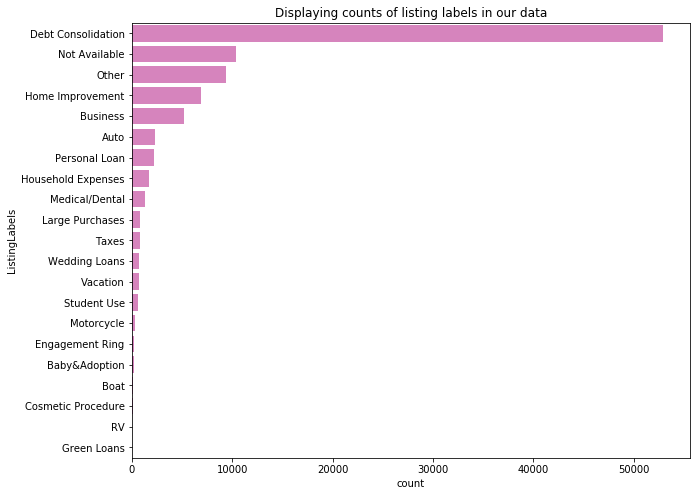

In [28]:
plt.figure(figsize = (10,8))
sns.countplot(y = 'ListingLabels',data = final_data,
              order = final_data['ListingLabels'].value_counts().index,color=sns.color_palette()[6])
plt.title('Displaying counts of listing labels in our data');

This means that the **maximum** number of loans is taken for the **debt consolidation** category.<br>
This may mean that **many borrowers already have existing debts** which is why they take debt consolidation loans in order **to reduce the burden of existing debts and offer a new loan every month at low interest.**

### Fifth variable "Borrower State"

In [29]:
fig = px.choropleth(locations = final_data['BorrowerState'].value_counts().index, 
                    locationmode = "USA-states", color = final_data['BorrowerState'].value_counts().values,
                    scope = "usa", hover_name = final_data['BorrowerState'].value_counts().index,
                    hover_data = {'Borrowers':final_data['BorrowerState'].value_counts().values})
fig.layout.coloraxis.colorbar.title = 'Number of Borrowers'
fig.layout.title = 'Map showing states and the number of borrowers from each state in the United States.'
fig.show()


Text(0.5, 1.0, 'Displaying counts for each state in data')

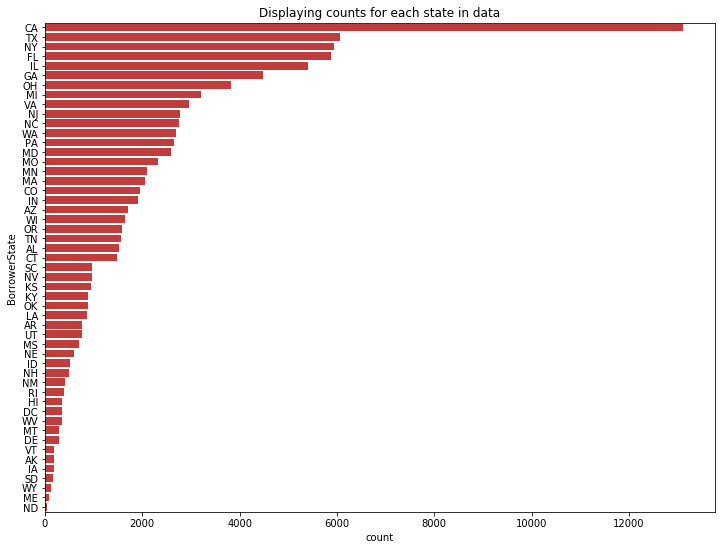

In [30]:
plt.figure(figsize = (12,9))
sns.countplot(y = 'BorrowerState', data = final_data,
              color = sns.color_palette()[3], order = final_data['BorrowerState'].value_counts().index)
plt.title('Displaying counts for each state in data')

The graphs shows that **maximum** number **13106** of borrowers are from **CA (California)**. <br>
presented by **yellow** color in **choropleth**

### Sixth variable "Occupation"

In [31]:
occupations = final_data['Occupation'].value_counts()
occupations

Other                          24006
Professional                   12341
Computer Programmer             3987
Executive                       3870
Teacher                         3485
                               ...  
Student - College Sophomore       47
Student - College Freshman        31
Judge                             22
Student - Community College       19
Student - Technical School        10
Name: Occupation, Length: 67, dtype: int64

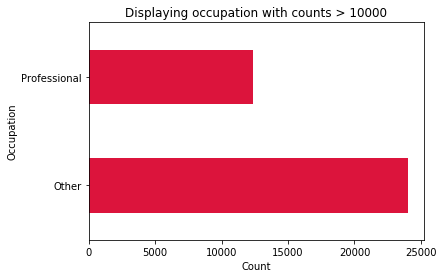

In [32]:
occupations[occupations > 10000].plot.barh(color = 'Crimson',rot = 0)
plt.title('Displaying occupation with counts > 10000')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

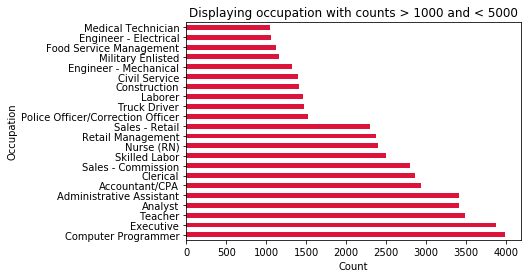

In [33]:
occupations[(occupations > 1000) & (occupations < 5000)].plot.barh(color = 'Crimson', rot = 0)
plt.title('Displaying occupation with counts > 1000 and < 5000')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

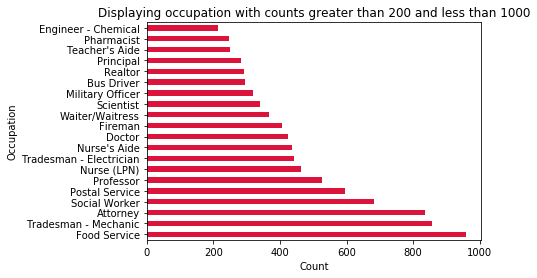

In [34]:
occupations[(occupations > 200) & (occupations < 1000)].plot.barh(color = 'Crimson',rot = 0)
plt.title('Displaying occupation with counts greater than 200 and less than 1000')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

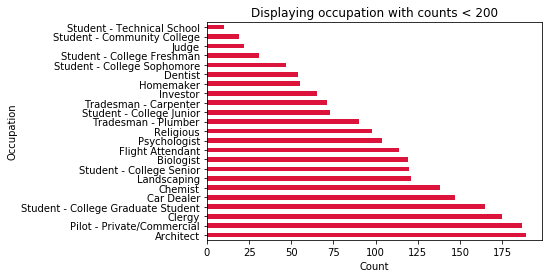

In [35]:
occupations[occupations < 200].plot.barh(color = 'Crimson', rot = 0)
plt.title('Displaying occupation with counts < 200')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

we can see that **"other"** category has the **highest** count and **"Student Technical School"** has the **lowest** count.

### Seventh variable "EmploymentStatus"

In [36]:
final_data['EmploymentStatus'].value_counts()

Employed         65172
Full-time        24117
Not available     2897
Other             2189
Self-employed      993
Part-time          884
Retired            702
Not employed        68
Name: EmploymentStatus, dtype: int64

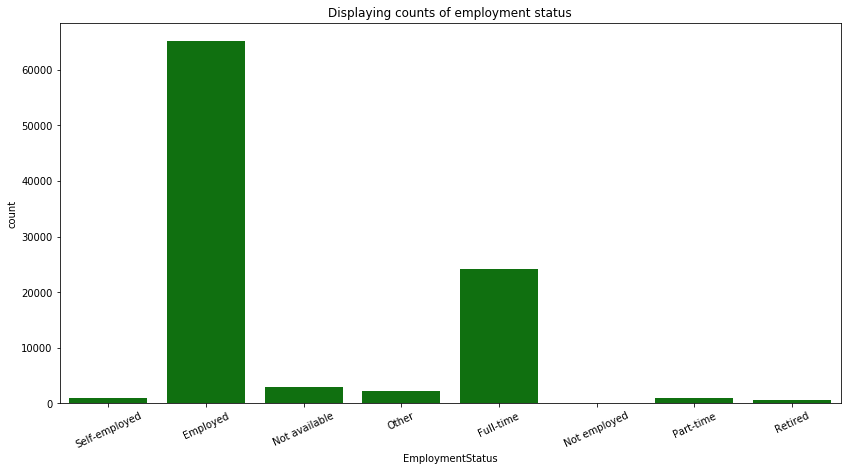

In [37]:
plt.figure(figsize = (14,7))
sns.countplot(x = 'EmploymentStatus', data = final_data, color = 'GREEN')
plt.xticks(rotation = 25)
plt.title('Displaying counts of employment status');

The plot shows that the **maximum** number of borrowers are **Employed** and the **minimum** number are **Not employed**

### Eighth variable "LoanOriginalAmount".

In [38]:
final_data['LoanOriginalAmount'].describe()

count    97022.000000
mean      8633.707417
std       6368.804747
min       1000.000000
25%       4000.000000
50%       7000.000000
75%      12500.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

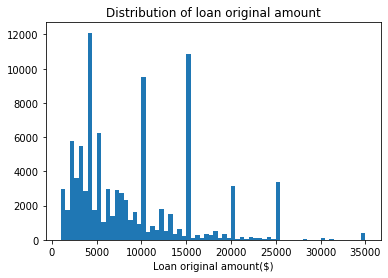

In [39]:
bins = np.arange(1000, final_data['LoanOriginalAmount'].max() + 40, 500)
plt.hist(x = 'LoanOriginalAmount', data = final_data, bins = bins)
plt.title('Distribution of loan original amount')
plt.xlabel('Loan original amount($)');

In [40]:
np.log10(final_data['LoanOriginalAmount'].describe())

count    4.986870
mean     3.936197
std      3.804058
min      3.000000
25%      3.602060
50%      3.845098
75%      4.096910
max      4.544068
Name: LoanOriginalAmount, dtype: float64

From the graph shows that:
- Data is **right skewed**.<br>
- From descriptive statistics we can see that **minimum loan original amount** is **1000** whereas **maximum loan original amount** is **35000.**<br>
- **Density of data points** is **highest** between **1000** and **8000**, This means that the loan original amount taken by the maximum number of borrowers ranges from 1000 to 8000.

In [41]:
outliers_dti = (final_data['DebtToIncomeRatio']>1)
out_df = final_data.loc[outliers_dti,:]

In [42]:
filter_df = final_data.loc[-outliers_dti,:]
filter_df.head()

LoanKey  Term LoanStatus  BorrowerAPR  BorrowerRate  \
0  E33A3400205839220442E84    36  Completed      0.16516        0.1580   
1  9E3B37071505919926B1D82    36    Current      0.12016        0.0920   
2  6954337960046817851BCB2    36  Completed      0.28269        0.2750   
3  A0393664465886295619C51    36    Current      0.12528        0.0974   
4  A180369302188889200689E    36    Current      0.24614        0.2085   

   ListingCategory (numeric) BorrowerState     Occupation EmploymentStatus  \
0                          0            CO          Other    Self-employed   
1                          2            CO   Professional         Employed   
2                          0            GA          Other    Not available   
3                         16            GA  Skilled Labor         Employed   
4                          2            MN      Executive         Employed   

   LoanOriginalAmount  CreditScoreRangeLower  CreditScoreRangeUpper  \
0                9425                  640.0                  659.0   
1               10000                  680.0                  699.0   
2                3001                  480.0                  499.0   
3               10000                  800.0                  819.0   
4               15000                  680.0                  699.0   

   DebtToIncomeRatio  Investors  StatedMonthlyIncome  MonthlyLoanPayment  \
0               0.17        258          3083.333333              330.43   
1               0.18          1          6125.000000              318.93   
2               0.06         41          2083.333333              123.32   
3               0.15        158          2875.000000              321.45   
4               0.26         20          9583.333333              563.97   

   IncomeVerifiable     ListingLabels  
0              True     Not Available  
1              True  Home Improvement  
2              True     Not Available  
3              True        Motorcycle  
4              True  Home Improvement

## Bivariate Exploration

In [43]:
filter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96344 entries, 0 to 113936
Data columns (total 18 columns):
LoanKey                      96344 non-null object
Term                         96344 non-null int64
LoanStatus                   96344 non-null object
BorrowerAPR                  96344 non-null float64
BorrowerRate                 96344 non-null float64
ListingCategory (numeric)    96344 non-null int64
BorrowerState                96344 non-null object
Occupation                   96344 non-null object
EmploymentStatus             96344 non-null object
LoanOriginalAmount           96344 non-null int64
CreditScoreRangeLower        96344 non-null float64
CreditScoreRangeUpper        96344 non-null float64
DebtToIncomeRatio            96344 non-null float64
Investors                    96344 non-null int64
StatedMonthlyIncome          96344 non-null float64
MonthlyLoanPayment           96344 non-null float64
IncomeVerifiable             96344 non-null bool
ListingLabels         

In [44]:
loan_df = filter_df.reset_index()

In [45]:
loan_df = loan_df.drop('index',axis=1)

In [46]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96344 entries, 0 to 96343
Data columns (total 18 columns):
LoanKey                      96344 non-null object
Term                         96344 non-null int64
LoanStatus                   96344 non-null object
BorrowerAPR                  96344 non-null float64
BorrowerRate                 96344 non-null float64
ListingCategory (numeric)    96344 non-null int64
BorrowerState                96344 non-null object
Occupation                   96344 non-null object
EmploymentStatus             96344 non-null object
LoanOriginalAmount           96344 non-null int64
CreditScoreRangeLower        96344 non-null float64
CreditScoreRangeUpper        96344 non-null float64
DebtToIncomeRatio            96344 non-null float64
Investors                    96344 non-null int64
StatedMonthlyIncome          96344 non-null float64
MonthlyLoanPayment           96344 non-null float64
IncomeVerifiable             96344 non-null bool
ListingLabels          

**find the correlation using heatmap between numerical variables**

In [47]:
numeric_var = ['Term','BorrowerAPR','BorrowerRate','LoanOriginalAmount',
               'CreditScoreRangeLower','CreditScoreRangeUpper','DebtToIncomeRatio',
               'Investors','StatedMonthlyIncome']

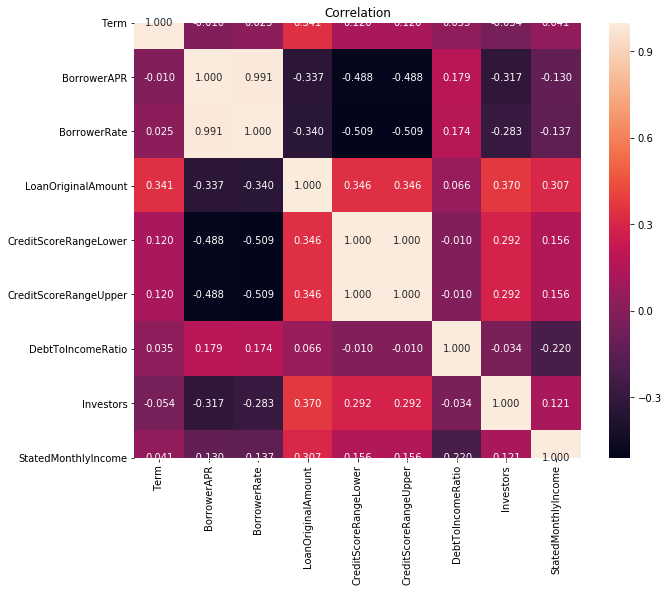

In [48]:
plt.figure(figsize = (10,8))
sns.heatmap(data = loan_df[numeric_var].corr(), annot = True, fmt = '.3f')
plt.title('Correlation');

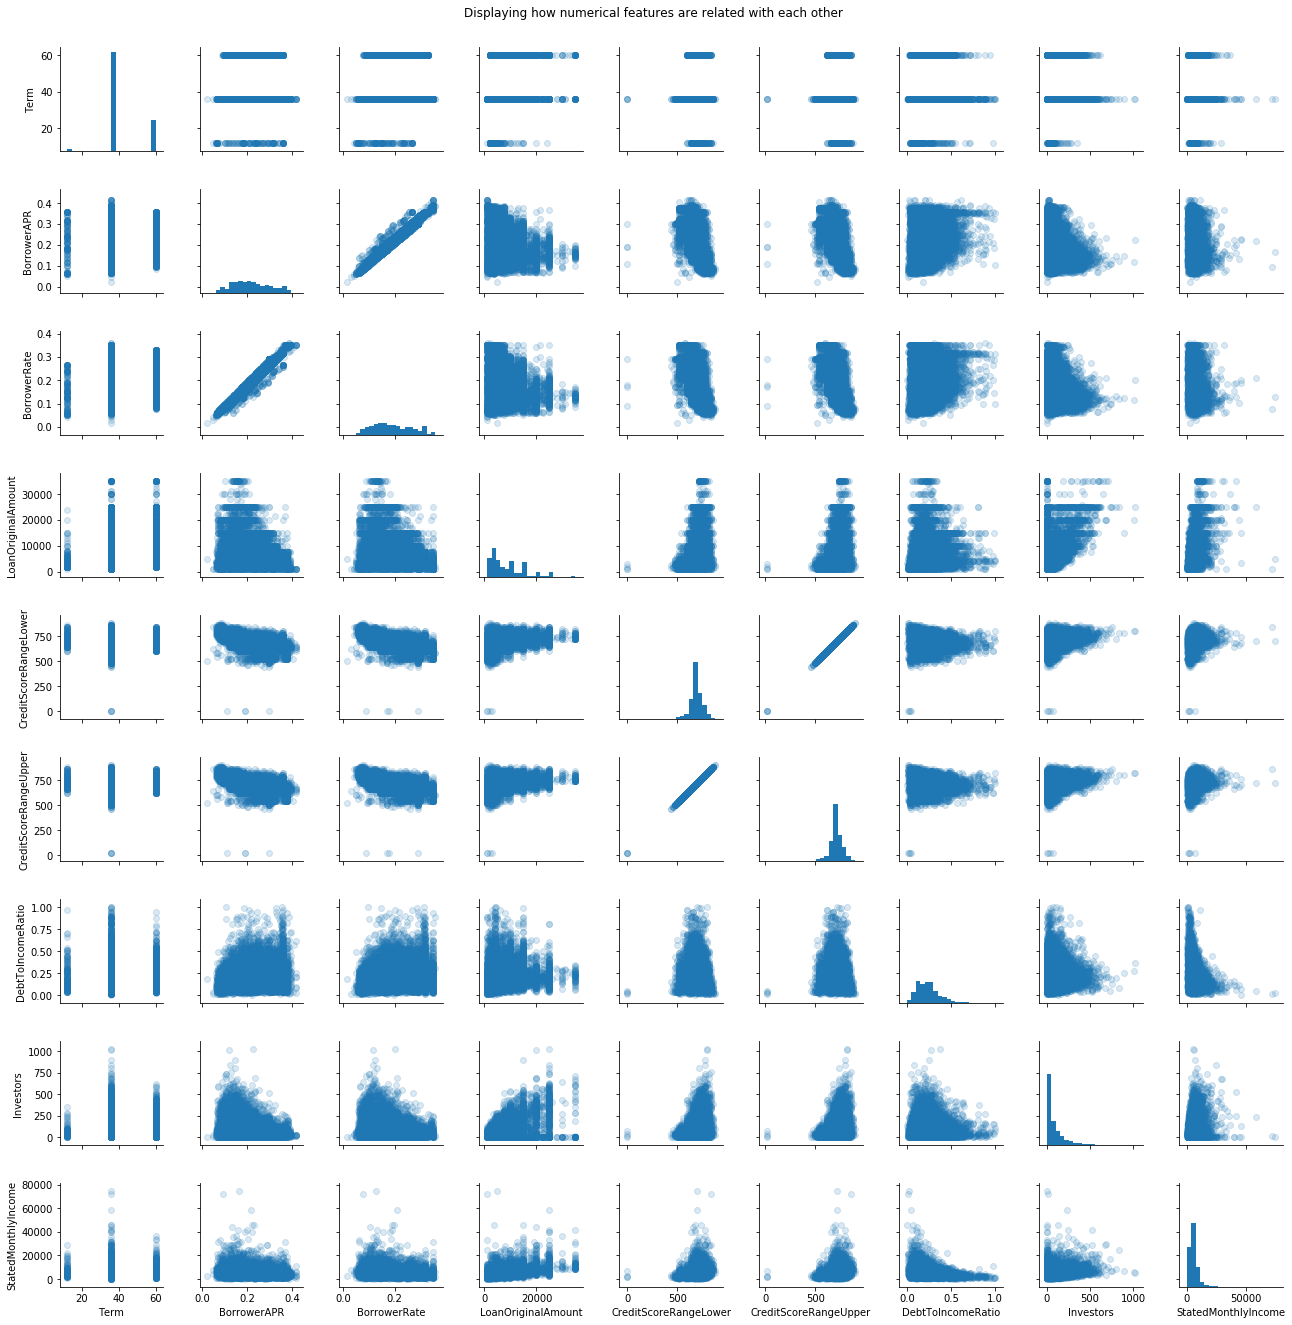

In [49]:
samples = np.random.choice(loan_df.shape[0], 10000, replace = False)
loan_samp = loan_df.loc[samples,:]
pg = sns.PairGrid(data = loan_samp, vars = numeric_var,height=2)
pg = pg.map_diag(plt.hist, bins = 20)
pg.map_offdiag(plt.scatter,alpha=1/6)
pg.fig.suptitle('Displaying how numerical features are related with each other',y=1.02);

From the graph shows that:
- If **Borrower Rate** **increases Borrower APR will also increase** and vice-versa.
- Their is **moderate negative correlation** between **loan original amount** and **Borrower APR**, **Borrower Rate** variables.
- **Borrower APR** is **highly** correlated with **Borrower Rate**.
- Their seem to be some outliers present in credit score range upper and credit score range lower variables.
- There is a **moderate correlation** between **investors** and **Loan original amount.**

*Removing outliers from credit score range upper and credit score range lower variables with values below 300*

In [50]:
loan_df[['CreditScoreRangeLower','CreditScoreRangeUpper']].describe()

CreditScoreRangeLower  CreditScoreRangeUpper
count           96344.000000           96344.000000
mean              688.809267             707.809267
std                60.978684              60.978684
min                 0.000000              19.000000
25%               660.000000             679.000000
50%               680.000000             699.000000
75%               720.000000             739.000000
max               880.000000             899.000000

In [51]:
outlier_data = (loan_df['CreditScoreRangeLower']<300) | (loan_df['CreditScoreRangeUpper']<300)

In [52]:
loan_df = loan_df.loc[-outlier_data,:]

In [53]:
loan_df = loan_df.reset_index()

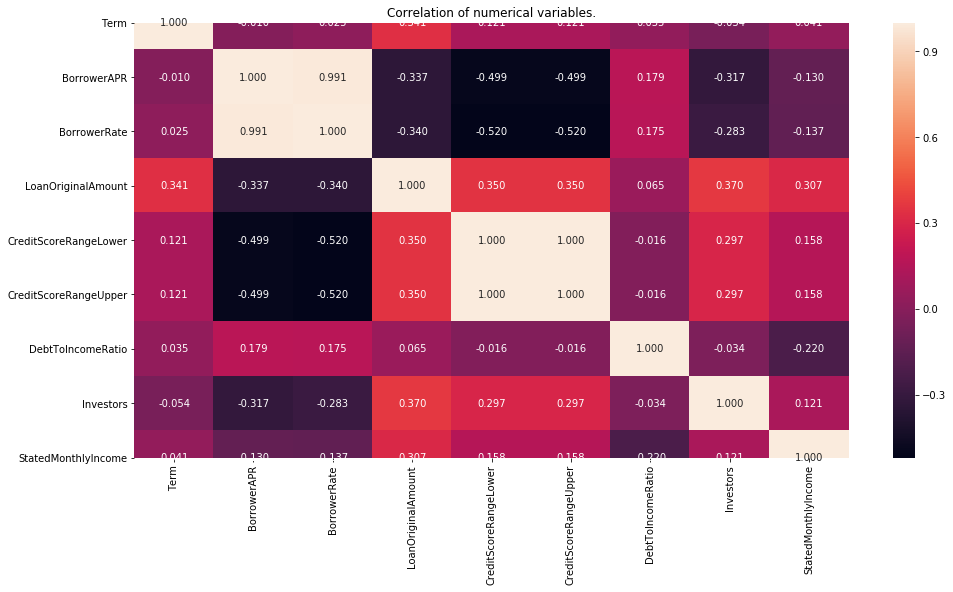

In [54]:
plt.figure(figsize = (16,8))
sns.heatmap(data=loan_df[numeric_var].corr(),annot=True,fmt='.3f')
plt.title('Correlation of numerical variables.');

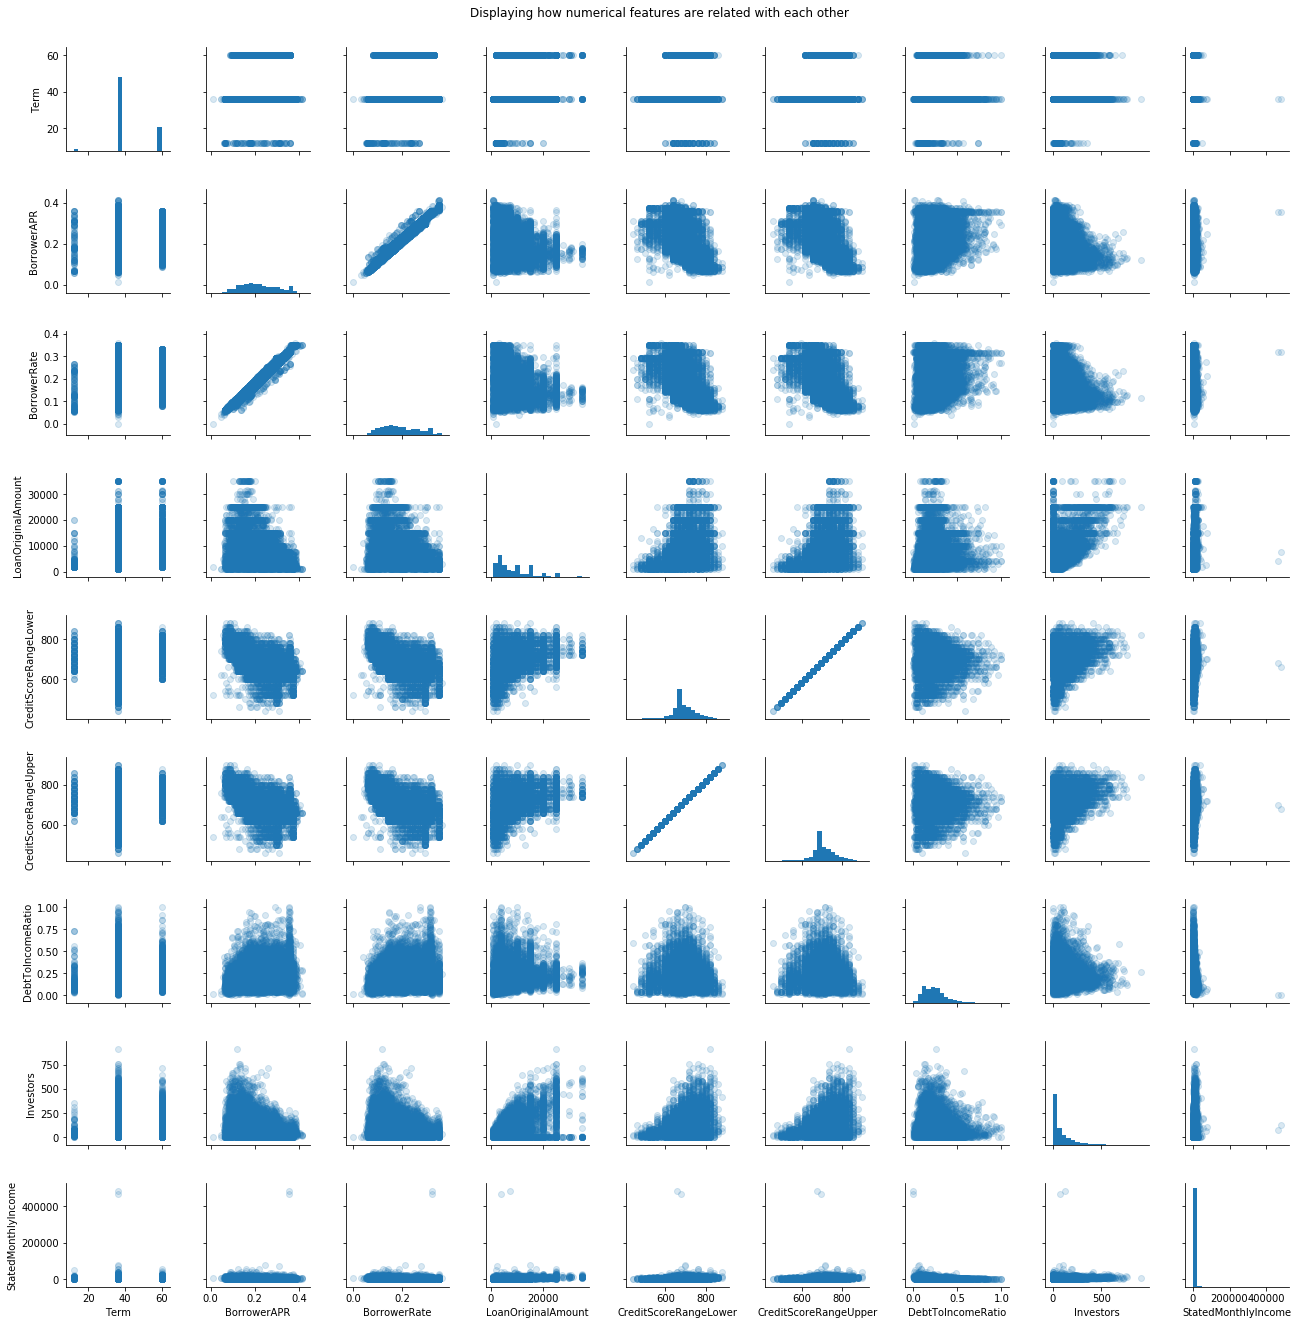

In [55]:
samples = np.random.choice(loan_df.shape[0], 10000, replace = False)
loan_samp = loan_df.loc[samples,:]
pg = sns.PairGrid(data = loan_samp, vars = numeric_var,height = 2)
pg = pg.map_diag(plt.hist, bins = 20)
pg.map_offdiag(plt.scatter,alpha = 1/6)
pg.fig.suptitle('Displaying how numerical features are related with each other',y = 1.02);

After removing outliers:<br>
- We can see the moderate negative correlation between investors and Borrower APR, Rate variable **more clearly.**<br>
- we can see the moderate negative correlation of credit score lower and upper range with both Borrower APR, Rate variables **more clearly.**<br>
- We can clearly see the **moderate positive correlation** between **loan original amount** and **Credit score** lower and upper.<br>
- Debt to income ratio is moderately negatively correlated with stated **monthly income.**

**Converting credit score range from numerical dataype to categorical data type.**

In [56]:
credit_score = np.array(loan_df['CreditScoreRangeLower'])

dictionary = {'Exceptional':np.arange(800,881,1),
              'Very Good':np.arange(740,800,1),
              'Good':np.arange(670,740,1),
              'Fair':np.arange(580,670,1),
              'Poor':np.arange(300,580,1)}

list_=[]
ns=[]

for i in range(credit_score.shape[0]):
    for key,val in dictionary.items():
        if credit_score[i] in val:
            list_.append(key)

loan_df = loan_df.assign(credit_score_class = list_)

In [57]:
# Convertin dataype to categorical.
credit_class = ['Poor','Fair','Good','Very Good','Exceptional']
t = pd.api.types.CategoricalDtype(categories = credit_class, ordered = True)
loan_df['credit_score_class'] = loan_df['credit_score_class'].astype(t)

**Borrower APR** and **credit score class** variable.

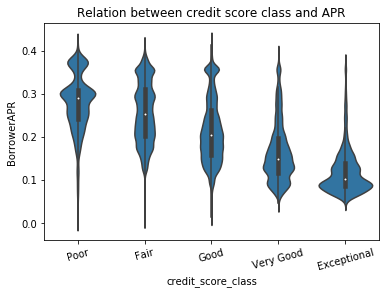

In [58]:
sns.violinplot(data = loan_df, x = 'credit_score_class', y = 'BorrowerAPR', 
               color = sns.color_palette()[0], innner = None)
plt.xticks(rotation = 15)
plt.title('Relation between credit score class and APR');

**Borrower APR** and **loan status** variable.

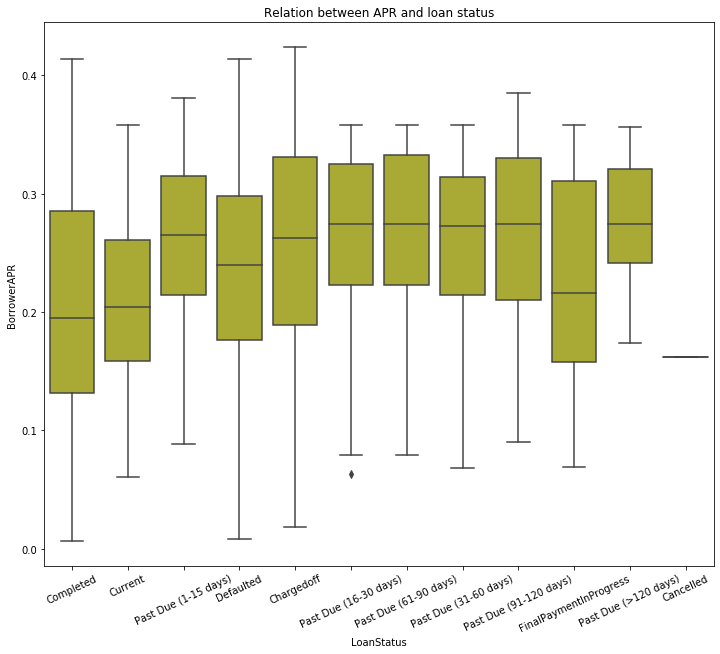

In [59]:
plt.figure(figsize = (12,10))
sns.boxplot(x = 'LoanStatus', y = 'BorrowerAPR',
            data = loan_df,color = sns.color_palette()[8])
plt.xticks(rotation = 25)
plt.title('Relation between APR and loan status');

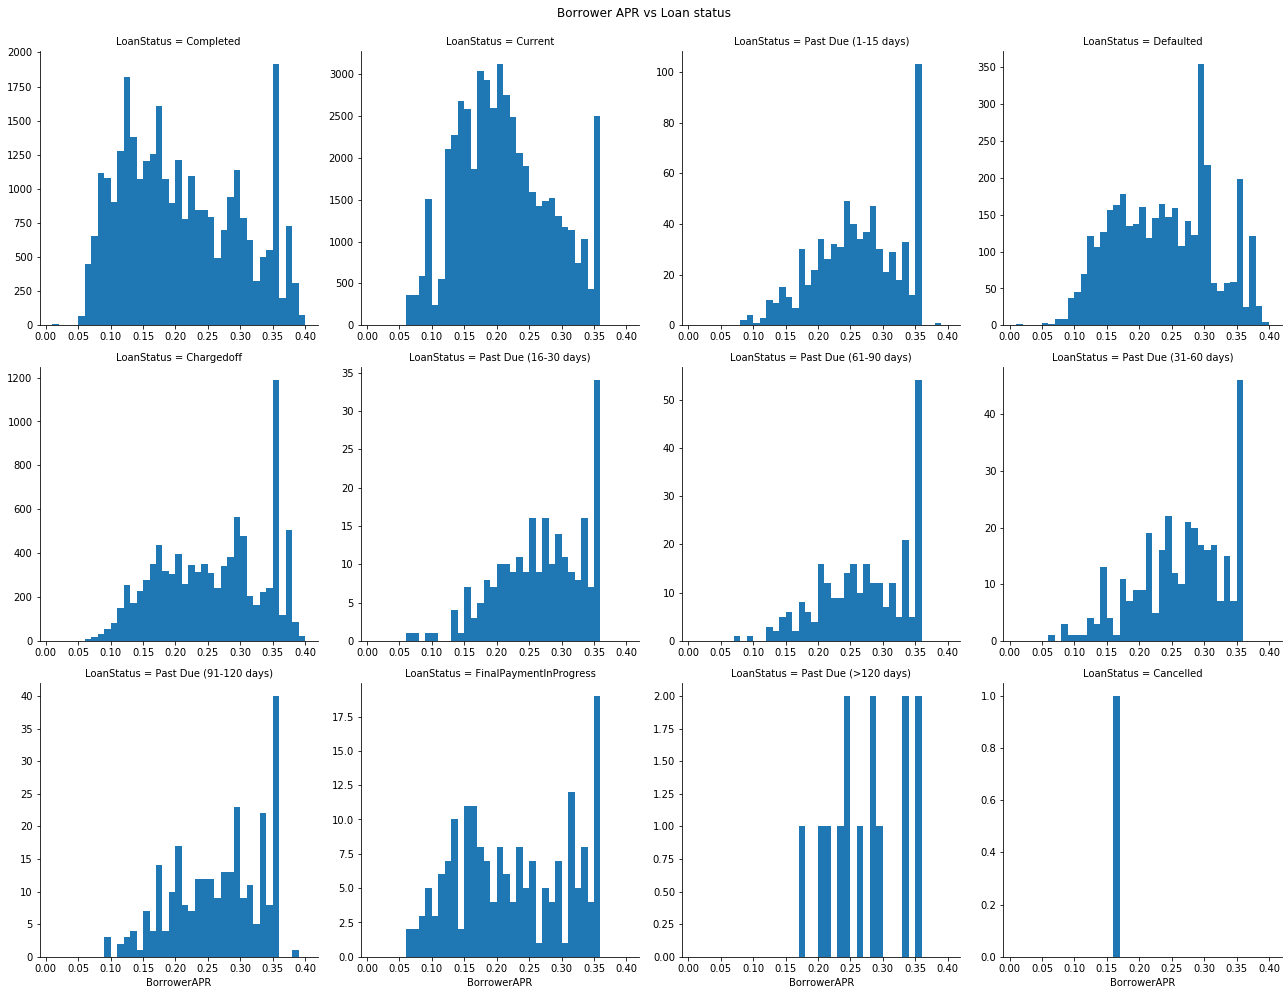

In [60]:
bins = np.arange(0.01, 0.4 + 0.01 , 0.01)
f = sns.FacetGrid(data = loan_df, col = 'LoanStatus',
                  col_wrap = 4, sharey = False,
                  sharex = False, height = 4.5)
f.map(plt.hist,'BorrowerAPR', bins = bins)
f.fig.suptitle('Borrower APR vs Loan status', y = 1.02);

Text(0.5, 1.0, 'Relation between loan status and APR')

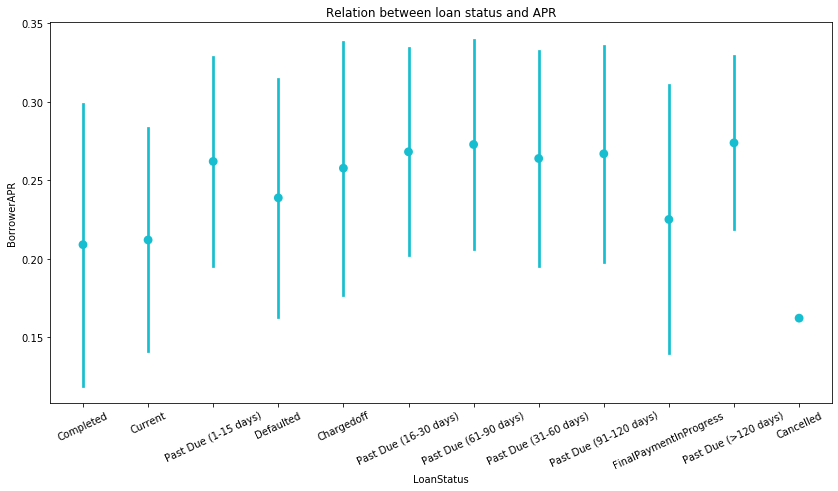

In [61]:
plt.figure(figsize = (14,7))
sns.pointplot(data = loan_df , x = 'LoanStatus', y ='BorrowerAPR',
              join = False,ci='sd',color = sns.color_palette()[9])
plt.xticks(rotation = 25)
plt.title('Relation between loan status and APR')


Text(0.5, 1.0, 'Relation between loan status and APR')

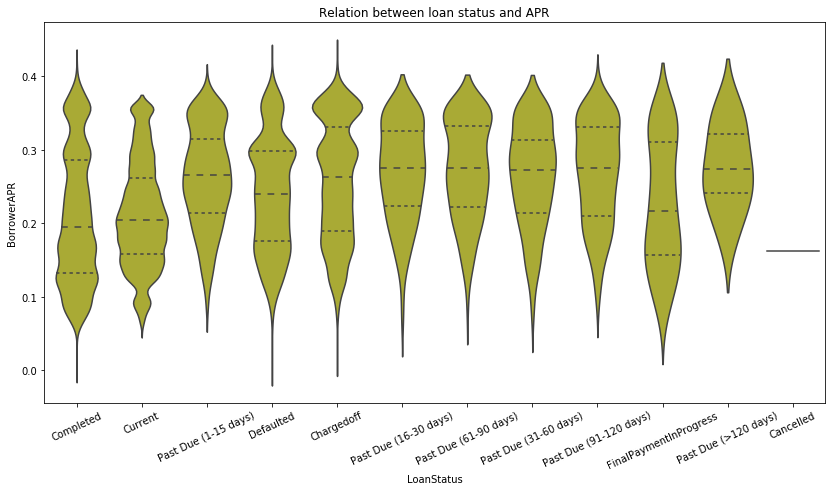

In [62]:
plt.figure(figsize = (14,7))
sns.violinplot(data = loan_df,x = 'LoanStatus',y = 'BorrowerAPR',
               inner = 'quartile', color =  sns.color_palette()[8])
plt.xticks(rotation = 25)
plt.title('Relation between loan status and APR')

**Borrower APR** and **Borrower Rate** variable.

In [63]:
for lab in ['BorrowerAPR','BorrowerRate']:
    bins = np.arange(0, loan_df[lab].max() + 0.04, 0.04)
    bins = [round(x,2) for x in bins]
    loan_df[f'{lab} cat'] = pd.cut(x = loan_df[lab], bins = bins, 
                                   labels = bins[1:], include_lowest = False)

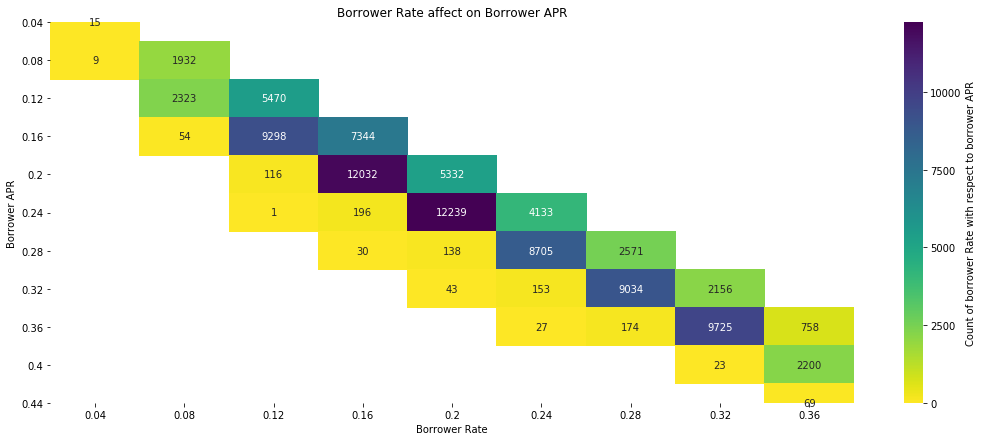

In [64]:
plt.figure(figsize = (18, 7))
sns.heatmap(loan_df.groupby(['BorrowerAPR cat','BorrowerRate cat']).size().unstack('BorrowerRate cat').replace({0:np.nan}),
            annot = True, fmt = '.0f', cmap = 'viridis_r' , vmin = 0 ,
            cbar_kws = {'label':'Count of borrower Rate with respect to borrower APR'})
plt.title('Borrower Rate affect on Borrower APR')
plt.xlabel('Borrower Rate')
plt.ylabel('Borrower APR')
plt.yticks(rotation = 0)
plt.show()

From above heatmap:
- Borrower Rate is highly proportional with borrower APR. This means that if we increase Borrower APR than Borrower Rate will also increase and vice-versa.<br>
- Maximum borrowers have APR and Rate between 0.1 and 0.2.<br>
- Between 0.05 and 0.2, count of borrower APR and borrower Rate increases. Between 0.2 and 0.35 count of borrower APR and rate decreases.

**Borrower APR** and **Loan Term** quantitative variables.

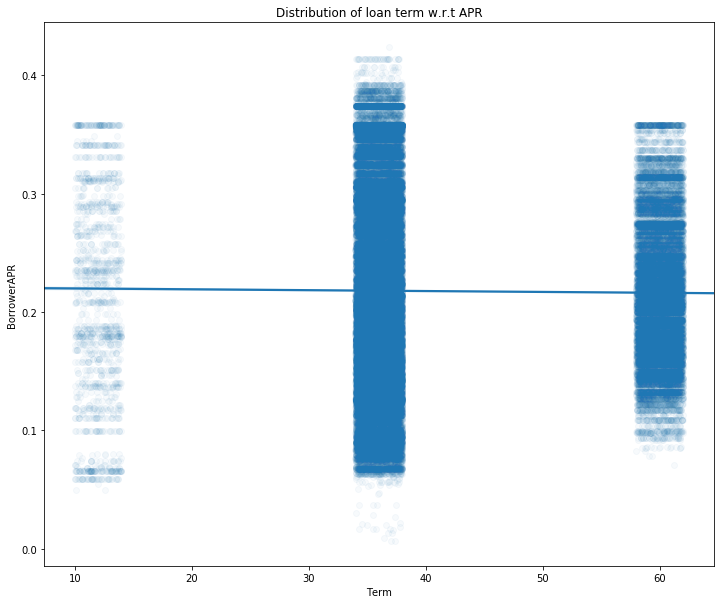

In [65]:
plt.figure(figsize = (12,10))
sns.regplot(data = loan_df, x = 'Term', y = 'BorrowerAPR', 
            truncate = False, x_jitter = 2, scatter_kws = {'alpha':1/30})
plt.title('Distribution of loan term w.r.t APR');

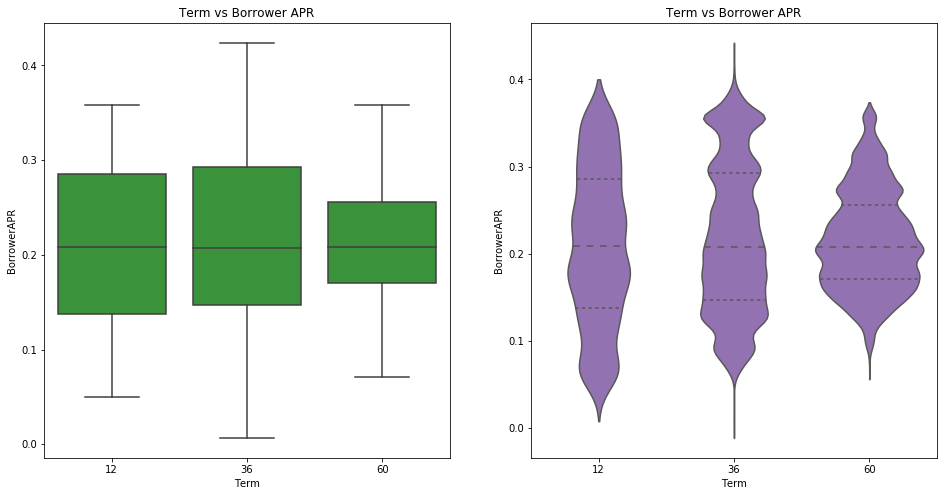

In [66]:
plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
sns.boxplot(x = 'Term', y = 'BorrowerAPR', data = loan_df,
            color = sns.color_palette()[2])
plt.title('Term vs Borrower APR')

plt.subplot(1,2,2)
sns.violinplot(x = 'Term',y = 'BorrowerAPR', data = loan_df,
               color = sns.color_palette()[4], inner = 'quartile')
plt.title('Term vs Borrower APR');

I have made several observations from above three plots:
- Maximum number of borrowers took loan for 36 months.
- Count of borrower APR is maximum at 36 months because of first observation.
- Minimum APR is 0.01 approx. at 36 month term which is a good sign.
- Maximum APR is above 0.4 at 36 month term which is considered as bad news.
- Second highest count of borrowers who took loan is for 60 month term.
- Using boxplot I see that distribution is slightly left skewed.
- Using violin plot, I observed that density of APR values is higher between first and second quartile (0.18 - 0.21 approx.) compare to the density of APR values between second and third quartile. I think range is also less for Borrower APR at 60.
- Minimum APR is 0.08 approx.
- Maximum APR is 0.36 approx.
- Mean of APR is approx. 0.22 at 12 month term.
- Smallest APR is 0.05 approx. 
- Largest APR is 0.36 approx. <br><br>

**Borrower APR** and **Loan original amount** quantitative variables.

Text(0.5, 1.0, 'Loan original amount vs APR')

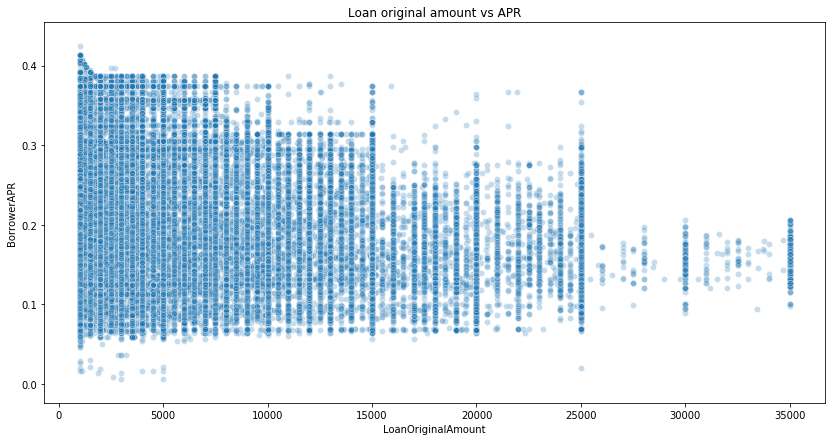

In [67]:
plt.figure(figsize = (14,7))
sns.scatterplot(x = 'LoanOriginalAmount', y = 'BorrowerAPR',
                data = loan_df, x_jitter = 0.3, alpha =1/4)
plt.title('Loan original amount vs APR')

We can see that there is a **gradual decrease** in **Borrower APR** with **loan amount** still it dosn't give a clear picture of count of APR between a given range of loan amount.

**Add annotations and transform x-axis and y-axis bins to get more accurate data representation**

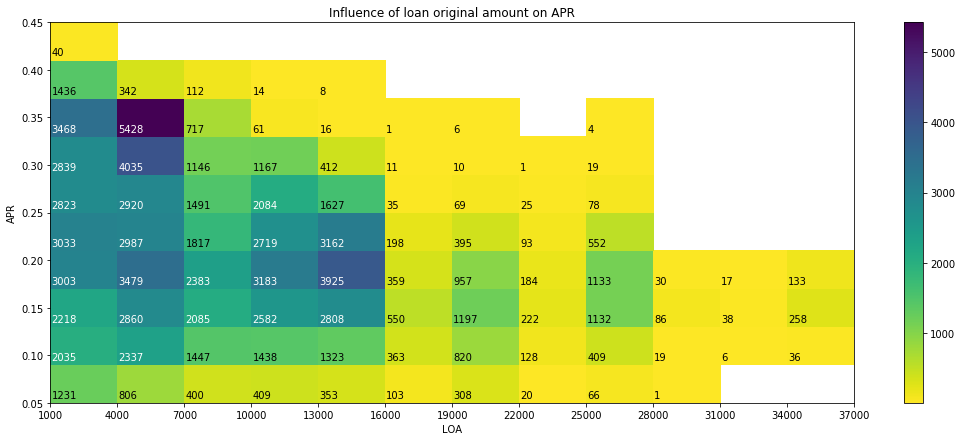

In [68]:
plt.figure(figsize = (18,7))

bins_x2 = np.arange(1000, 35000 + 5000, 3000)
bins_y2 = np.arange(0.05, 0.40 + 0.06, 0.04)

labels = ['{}'.format(x) for x in bins_x2]
gt = plt.hist2d(y = 'BorrowerAPR',x = 'LoanOriginalAmount', data = loan_df,
                cmin = 0.5, cmap = 'viridis_r', bins = [bins_x2,bins_y2])
count = gt[0]

for i in range(count.shape[0]):
    for j in range(count.shape[1]):
        annot = count[i,j]
        if annot!=np.nan and annot >= 2000:
            plt.text(x=gt[1][i]+50,y=gt[2][j]+0.005,s=int(annot),color='white')
        elif annot !=np.nan and annot > 0:
             plt.text(x=gt[1][i]+50,y=gt[2][j]+0.005,s=int(annot),color='black')

plt.colorbar()
plt.xticks(bins_x2,labels)
plt.title('Influence of loan original amount on APR')
plt.xlabel('LOA')
plt.ylabel('APR');

> Using the above heatmap, following observations have been made:
> - Count of borrowers APR between 1000-7000 approx. is highest.
> - Highest count of APR between 1000-7000 is 5428 which is situated at 0.35 approx.
> - As loan original amount is increasing, borrower APR is decreasing and count of borrower APR is decreasing too. (yellow boxes after 16000 loan amount)<br><br>
It is now getting more clear that the borrowers who took small amount of loans have highest count as well as have highest APR values. But I want to see why borrowers with small loan amount have high APR and also what are the reasons behind it?. Is it because of type of loan or because of high debt to income ratio or due to occupation etc.

Plotting violin plot using seaborn's pairgrid with **APR values >=0.20.**

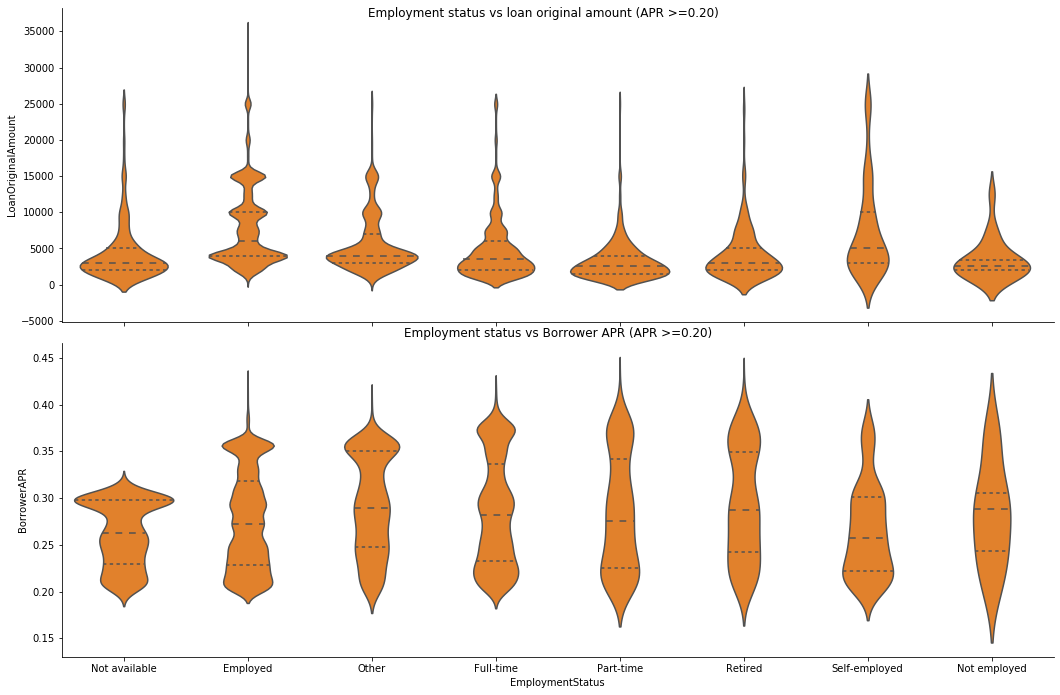

In [69]:
bad_apr = loan_df[loan_df['BorrowerAPR'] >= 0.2]
g = sns.PairGrid(data = bad_apr, y_vars = ['LoanOriginalAmount','BorrowerAPR'], 
                 x_vars = 'EmploymentStatus', height = 4.9, diag_sharey = False, aspect = 3)
g.map(sns.violinplot, inner = 'quartile', color = sns.color_palette()[1])
g.fig.suptitle('Employment status vs loan original amount (APR >=0.20)')
plt.title('Employment status vs Borrower APR (APR >=0.20)')
plt.show()

> - For every employment status most of the loan original amount is between 1000 and 5000.
> - Not employed status has the least count but their APR ranges from 0.15 to 0.42 approx. Also, most of the APR values lie between median (second quartile 0.28 approx.) and third quartile (0.32 approx.).
> - Not available status has 1647 counts whose APR is >= 0.20. Most of the APR values are present between 0.28 and 0.32.<br><br>
> Nearly for every employment status, most of the loan amount lies in same range and also, borrowers who are employed seems to have APR normally distributed compare to other borrowers APR.<br><br>
__So, according to me, considering employment status is not a good idea to find out that why borrower APR is high for some loan amount and low for another and also what affects borrower APR. I will try to explore other categorical variables and compare them with borrower APR and Borrower Rate furhter in my exploratory analysis.__

**Occupation** ,**Borrower APR**  qualitative and quantitative variables respectively.

In [70]:
occ_apr = loan_df.groupby('Occupation')['BorrowerAPR'].mean().reset_index()

In [71]:
occ_apr

Occupation  BorrowerAPR
0             Accountant/CPA     0.208621
1   Administrative Assistant     0.240964
2                    Analyst     0.201773
3                  Architect     0.189130
4                   Attorney     0.189071
..                       ...          ...
62   Tradesman - Electrician     0.212326
63      Tradesman - Mechanic     0.220717
64       Tradesman - Plumber     0.214175
65              Truck Driver     0.224521
66           Waiter/Waitress     0.237010

[67 rows x 2 columns]

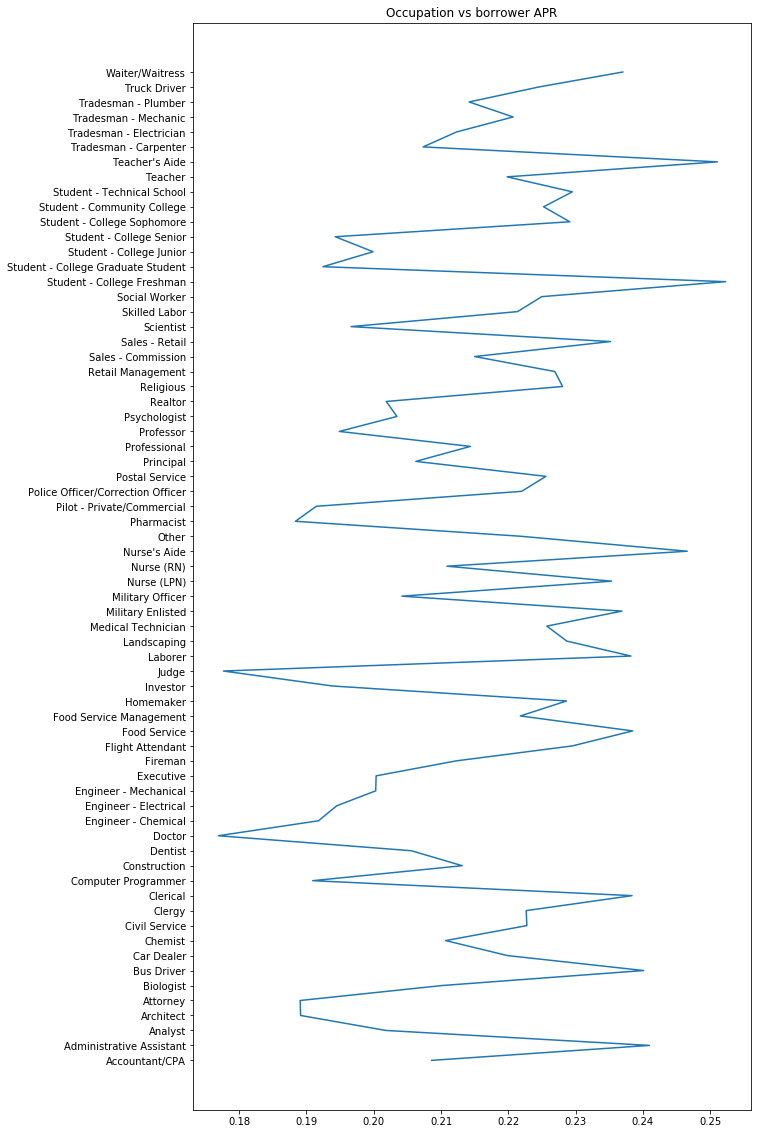

In [72]:
plt.figure(figsize = (10,20))
plt.errorbar(y = 'Occupation', x = 'BorrowerAPR', data = occ_apr)
plt.title('Occupation vs borrower APR');

We can **can't make clear interpretation** about which occupations have low average apr and which has highest APR.

In [73]:
filter1 = occ_apr[occ_apr['BorrowerAPR'] < 0.2]
f2 = occ_apr['BorrowerAPR'].between(0.2, 0.21, inclusive = False)
filter2 = occ_apr.loc[f2,:]
f3 = occ_apr['BorrowerAPR'].between(0.21, 0.22, inclusive = False)
filter3 = occ_apr.loc[f3,:]
f4 = occ_apr['BorrowerAPR'].between(0.22, 0.23, inclusive = False)
filter4 = occ_apr.loc[f4,:]
f5 = occ_apr['BorrowerAPR'].between(0.23, 0.25, inclusive = False)
filter5 = occ_apr.loc[f5,:]


Text(0.5, 0, 'Occupation')

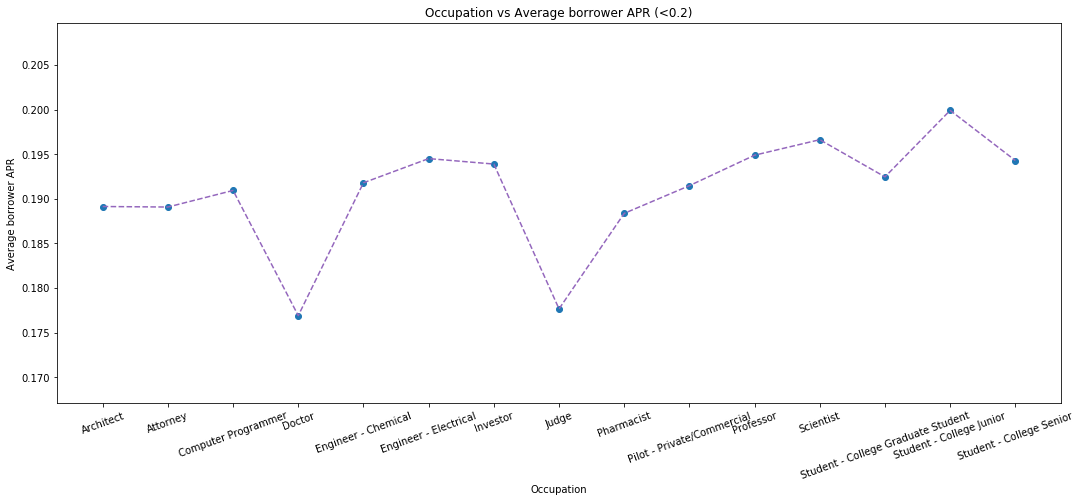

In [74]:
# Line plot for APR less than 0.20
plt.figure(figsize = [18,7])
plt.scatter(x='Occupation',y='BorrowerAPR',data=filter1)
plt.errorbar(x='Occupation',y='BorrowerAPR',data=filter1,c=sns.color_palette()[4],linestyle='--',)
plt.xticks(rotation=20)
plt.ylabel('Average borrower APR')
plt.title('Occupation vs Average borrower APR (<0.2)')
plt.xlabel('Occupation')

Text(0, 0.5, 'Average borrower APR')

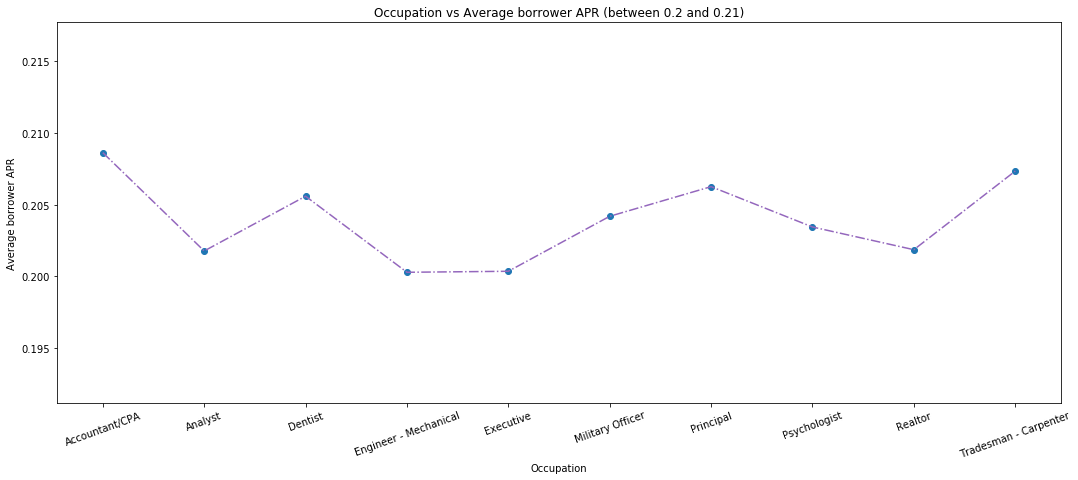

In [75]:
# Line plot for APR greater than 0.20 and less than 0.21
plt.figure(figsize = [18,7])
plt.scatter(x = 'Occupation', y = 'BorrowerAPR', data = filter2)
plt.errorbar(x = 'Occupation', y = 'BorrowerAPR', data = filter2, 
             c = sns.color_palette()[4], linestyle = '-.',)
plt.xticks(rotation = 20)
plt.title('Occupation vs Average borrower APR (between 0.2 and 0.21)')
plt.xlabel('Occupation')
plt.ylabel('Average borrower APR')

Text(0, 0.5, 'Average borrower APR')

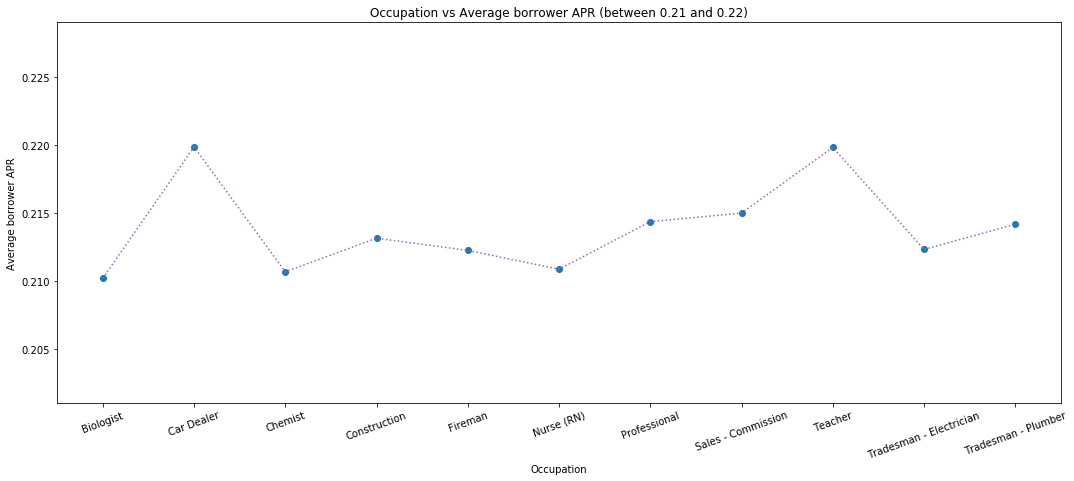

In [76]:
# Line plot for APR greater than 0.21 and less than 0.22
plt.figure(figsize = [18,7])
plt.scatter(x = 'Occupation', y = 'BorrowerAPR', data = filter3)
plt.errorbar(x = 'Occupation',y = 'BorrowerAPR', data = filter3,
             c = sns.color_palette()[4], linestyle = ':',)
plt.xticks(rotation = 20)
plt.title('Occupation vs Average borrower APR (between 0.21 and 0.22)')
plt.xlabel('Occupation')
plt.ylabel('Average borrower APR')

Text(0, 0.5, 'Average borrower APR')

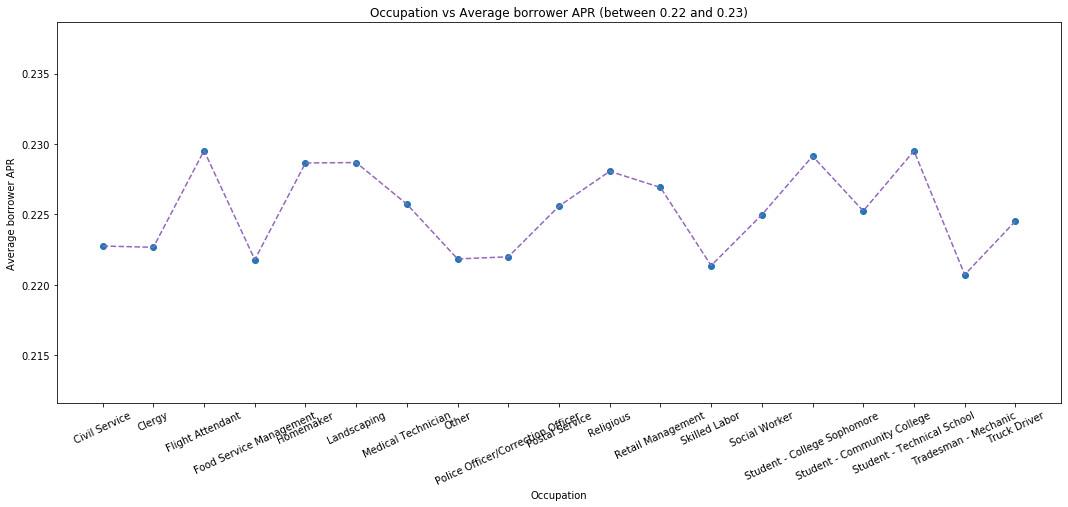

In [77]:
# Line plot for APR greater than 0.22 and less than 0.23
plt.figure(figsize = [18,7])
plt.scatter(x = 'Occupation', y = 'BorrowerAPR', data = filter4)
plt.errorbar(x = 'Occupation', y = 'BorrowerAPR', data = filter4,
             c = sns.color_palette()[4], linestyle = '--')
plt.xticks(rotation = 25)
plt.title('Occupation vs Average borrower APR (between 0.22 and 0.23)')
plt.xlabel('Occupation')
plt.ylabel('Average borrower APR')

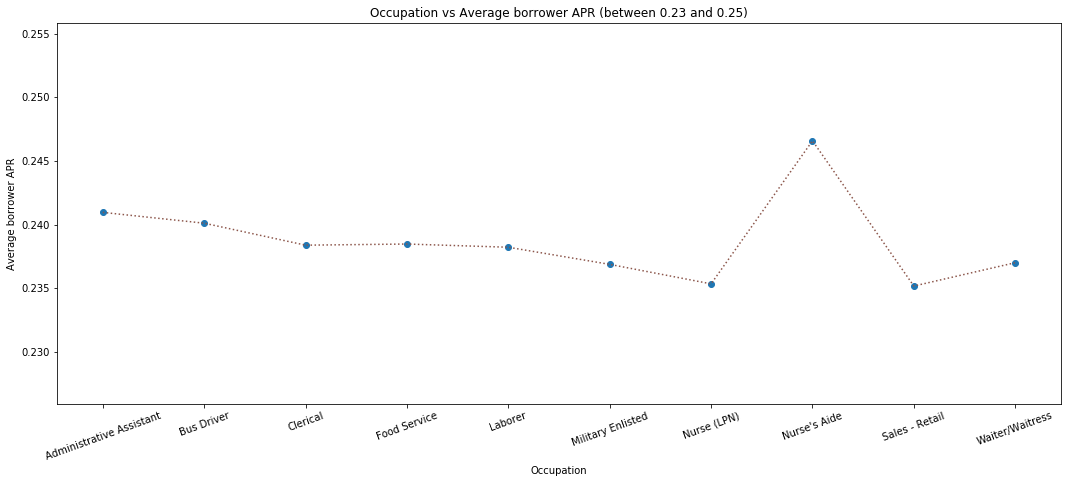

In [78]:
# Line plot for APR greater than 0.23 and less than 0.25
plt.figure(figsize = [18,7])
plt.scatter(x = 'Occupation', y = 'BorrowerAPR', data = filter5)
plt.errorbar(x = 'Occupation', y = 'BorrowerAPR', data = filter5,
             c = sns.color_palette()[5], linestyle= 'dotted',)
plt.xticks(rotation = 20)
plt.title('Occupation vs Average borrower APR (between 0.23 and 0.25)')
plt.xlabel('Occupation')
plt.ylabel('Average borrower APR');

Explore **credit class** and **loan status.**

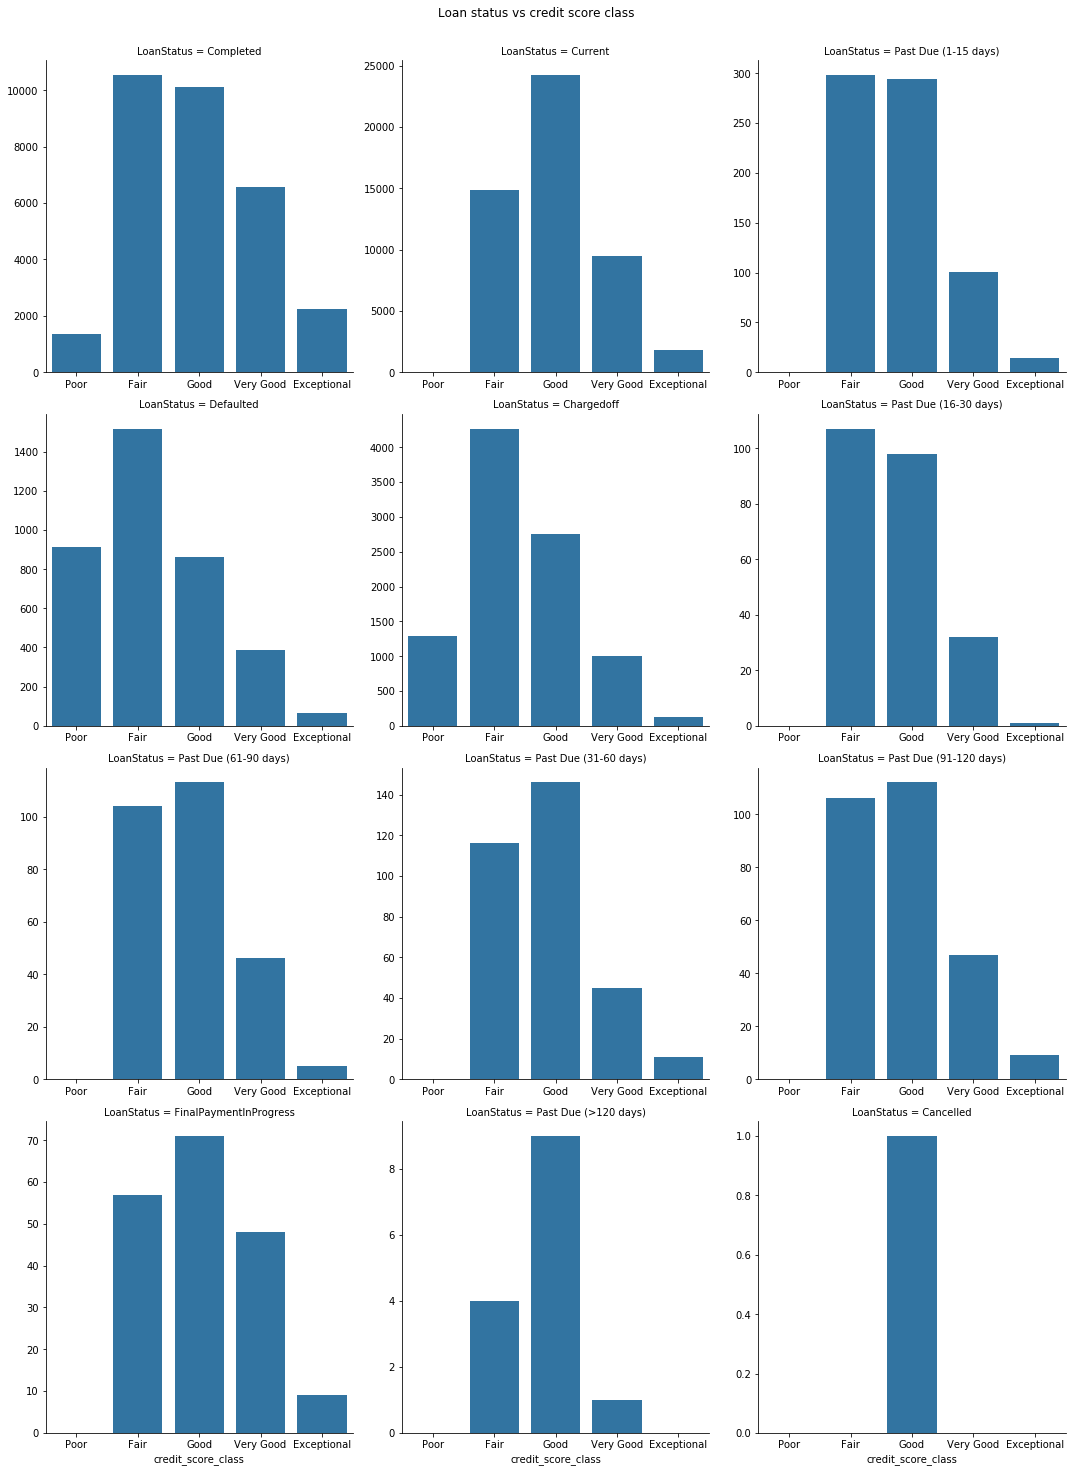

In [79]:
# Plotting countplot using seaborn's facetgrid.
ls = sns.FacetGrid(data = loan_df, col = 'LoanStatus',
                   col_wrap = 3, height = 5, sharey = False, sharex = False)
ls.map(sns.countplot, 'credit_score_class', order = ['Poor','Fair','Good','Very Good','Exceptional'])
ls.fig.suptitle('Loan status vs credit score class', y = 1.02);

From above facet plot I have made some observations:
- For loan status **'Default'** most of the borrowers have either **fair** or **poor credit score.**<br>
- I can't make much interpretations because their could be other features which show some kind of relationship with these two categorical variables.

**Borrower APR** and **Debt To Income Ratio**.

In [80]:
bins_edges = np.arange(0, 1 + 0.1 , 0.01)
bins_center = bins_edges[:-1] + 0.0025

# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(loan_df['DebtToIncomeRatio'], bins_edges, include_lowest = True)
displ_binned

0        (0.16, 0.17]
1        (0.17, 0.18]
2        (0.05, 0.06]
3        (0.14, 0.15]
4        (0.25, 0.26]
             ...     
96302    (0.12, 0.13]
96303     (0.1, 0.11]
96304     (0.5, 0.51]
96305    (0.47, 0.48]
96306    (0.22, 0.23]
Name: DebtToIncomeRatio, Length: 96307, dtype: category
Categories (109, interval[float64]): [(-0.001, 0.01] < (0.01, 0.02] < (0.02, 0.03] < (0.03, 0.04] ... (1.05, 1.06] < (1.06, 1.07] < (1.07, 1.08] < (1.08, 1.09]]

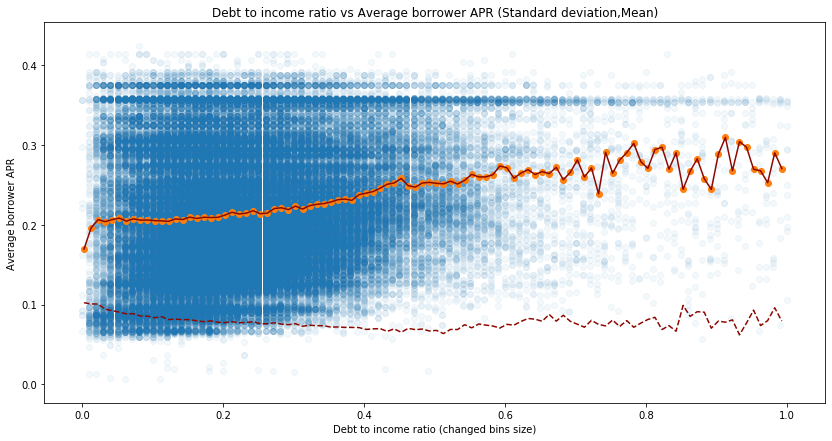

In [81]:
bins_edges = np.arange(0, 1 + 0.1 , 0.01)
bins_center = bins_edges[:-1] + 0.0025

displ_binned = pd.cut(loan_df['DebtToIncomeRatio'], bins_edges, include_lowest = True)
plt.figure(figsize = [14, 7])
comb_mean = loan_df['BorrowerAPR'].groupby(displ_binned).mean()
comb_std = loan_df['BorrowerAPR'].groupby(displ_binned).std()

# Plot the summarized data
plt.scatter(data = loan_df, x = 'DebtToIncomeRatio', 
            y = 'BorrowerAPR', alpha = 1/20)
plt.scatter(x = bins_center, y = comb_mean)
plt.errorbar(x = bins_center, y = comb_mean, c = sns.color_palette('dark')[3])
plt.errorbar(x = bins_center, y = comb_std, c = sns.color_palette('dark')[3], linestyle = '--')

plt.title('Debt to income ratio vs Average borrower APR (Standard deviation,Mean)')
plt.xlabel('Debt to income ratio (changed bins size)')
plt.ylabel('Average borrower APR');

Their a **weak positive correlation** which indicate that while both variables **DTI** and **APR** tend to go up in response to one another, **the relationship isn't very strong**.

Explore **Borrower APR** and **Investors** variables.

In [82]:
bins_edges = np.arange(1, 1189 + 100, 100)
bins_center = bins_edges[:-1] + 50

# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(loan_df['Investors'], bins_edges, include_lowest = True)
displ_binned

0        (201.0, 301.0]
1        (0.999, 101.0]
2        (0.999, 101.0]
3        (101.0, 201.0]
4        (0.999, 101.0]
              ...      
96302    (0.999, 101.0]
96303    (0.999, 101.0]
96304    (101.0, 201.0]
96305    (201.0, 301.0]
96306    (0.999, 101.0]
Name: Investors, Length: 96307, dtype: category
Categories (12, interval[float64]): [(0.999, 101.0] < (101.0, 201.0] < (201.0, 301.0] < (301.0, 401.0] ... (801.0, 901.0] < (901.0, 1001.0] < (1001.0, 1101.0] < (1101.0, 1201.0]]

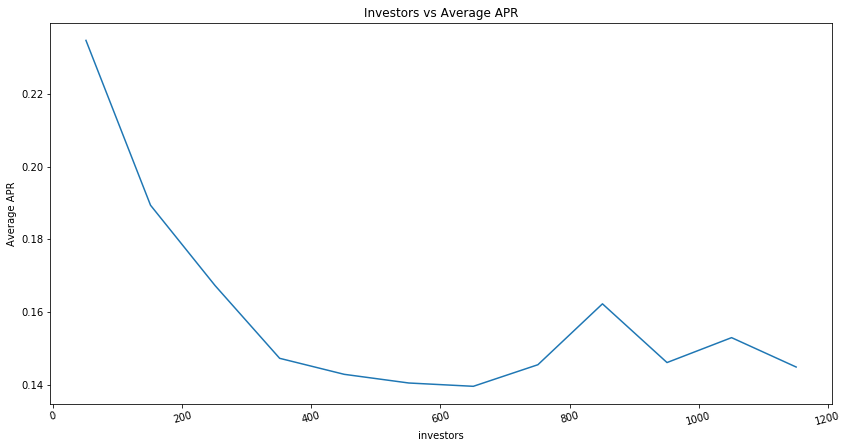

In [83]:
plt.figure(figsize = [14,7])
comb_mean = loan_df['BorrowerAPR'].groupby(displ_binned).mean()
comb_std = loan_df['DebtToIncomeRatio'].groupby(displ_binned).std()

# Plot the summarized data
plt.errorbar(x = bins_center, y = comb_mean)
plt.xticks(rotation = 15);
plt.xlabel('investors')
plt.ylabel('Average APR')
plt.title('Investors vs Average APR');

Their a **moderate negative correlation** which indicate that while both variables **Investors** and **APR** tend to go down in response to one another, **the relationship is moderately strong.**

### How did the feature(s) of interest vary with other features in the dataset?
Borrower APR was high for less loan original amount and low for high loan amount. Also, Borrower APR and debt to income ratio although tend to go up, had weak correlation whereas borrower APR was weaky negative correlated with monthly income.

## Multivariate Exploration

Explore **Loan Status** with **Borrower APR** and **Borrower Rate**

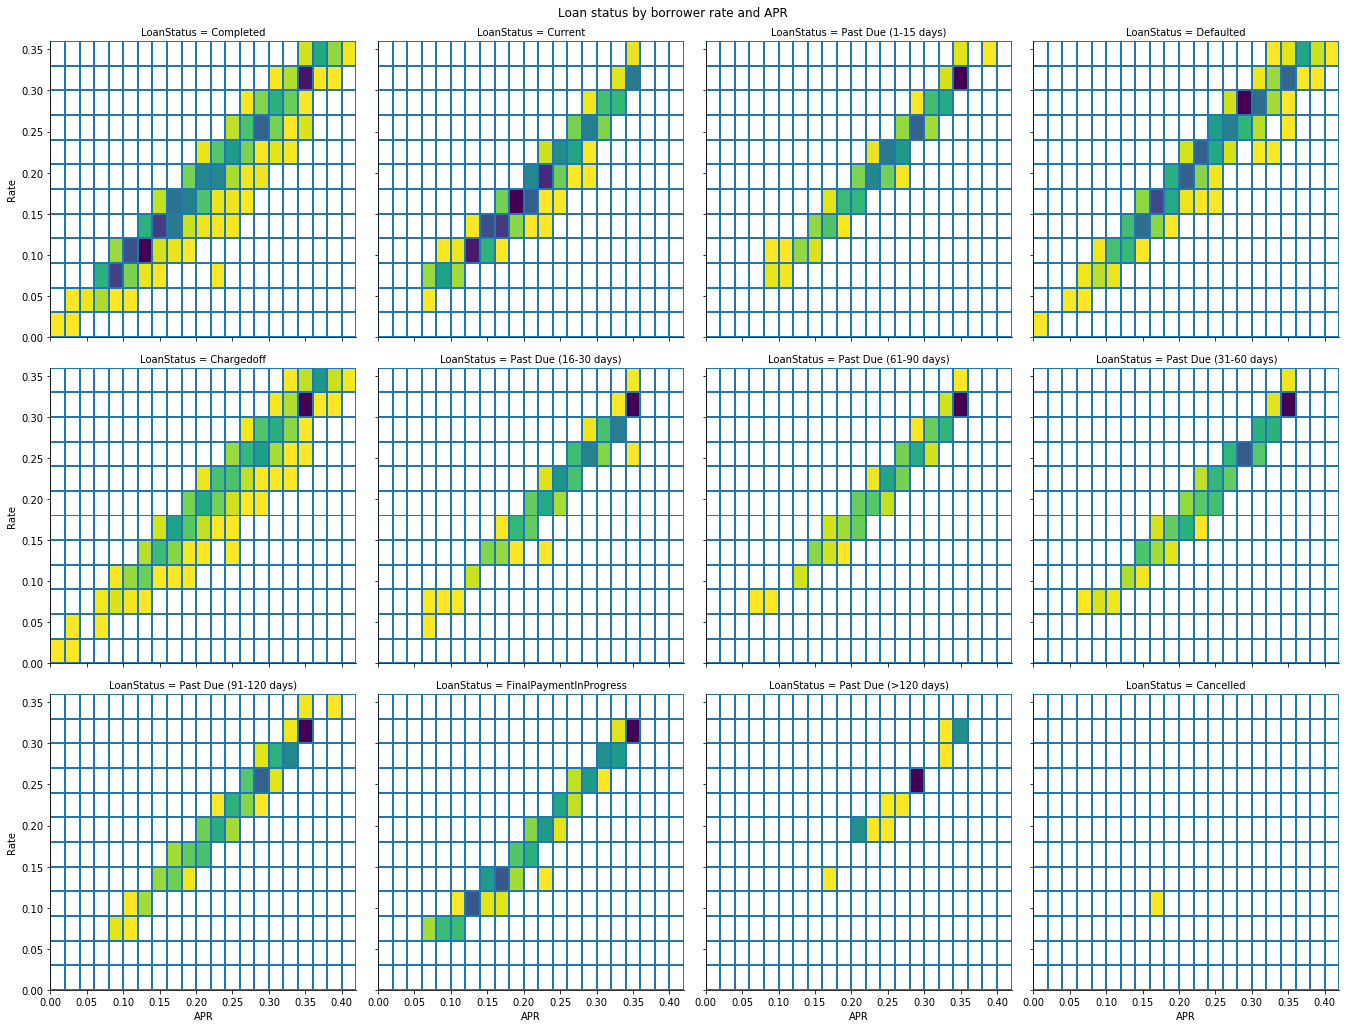

In [84]:
# Plotting heatmap using seaborn's facetgrid.
bins_x = np.arange(0,loan_df['BorrowerAPR'].max() + 0.01,0.02)
bins_y = np.arange(0,loan_df['BorrowerRate'].max() + 0.01,0.03)
g = sns.FacetGrid(data = loan_df, col = 'LoanStatus', col_wrap = 4, height = 4.7)
g.map(plt.hist2d, 'BorrowerAPR', 'BorrowerRate',bins=[bins_x,bins_y], cmap = 'viridis_r', cmin = 0.5)
g.set_xlabels('APR')
g.set_ylabels('Rate')
g.fig.suptitle('Loan status by borrower rate and APR', y = 1.01)

plt.show()

I have made several observations:
- Out of all loan status, 'completed' and 'current' status are the only ones with maximum count of APR and rate less than or equal to 0.2.<br>
- Rest of the loan status have a 'cloud' of points above 0.2 for both APR and Rate except 'cancelled' status as it has only one record in our data.<br>
- If borrower APR and rate are high than loan status is more likely to be anything except 'current' and 'completed'

Explore **loan status** , **Loan Term** , **loan amount** and **debt to income ratio**.

I want to see what features affect loan status.

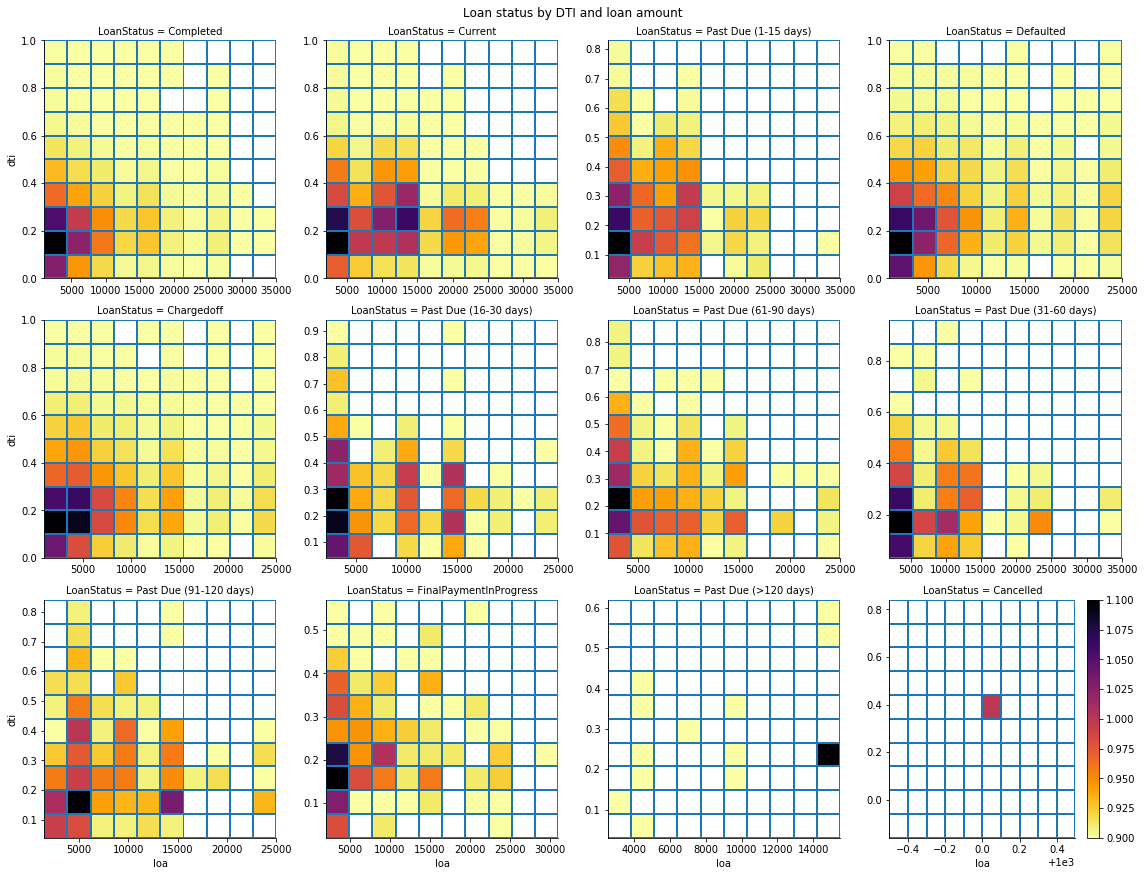

In [85]:
# Plotting heatmap using seavorn's facetgrid
g = sns.FacetGrid(data = loan_df, col = 'LoanStatus', col_wrap = 4, height = 4, sharex = False, sharey = False)
g.map(plt.hist2d, 'LoanOriginalAmount', 'DebtToIncomeRatio',cmap = 'inferno_r',cmin = 0.5)
g.set_xlabels('loa')
g.set_ylabels('dti')
g.fig.suptitle('Loan status by DTI and loan amount', y = 1.01)
plt.colorbar()
plt.show()

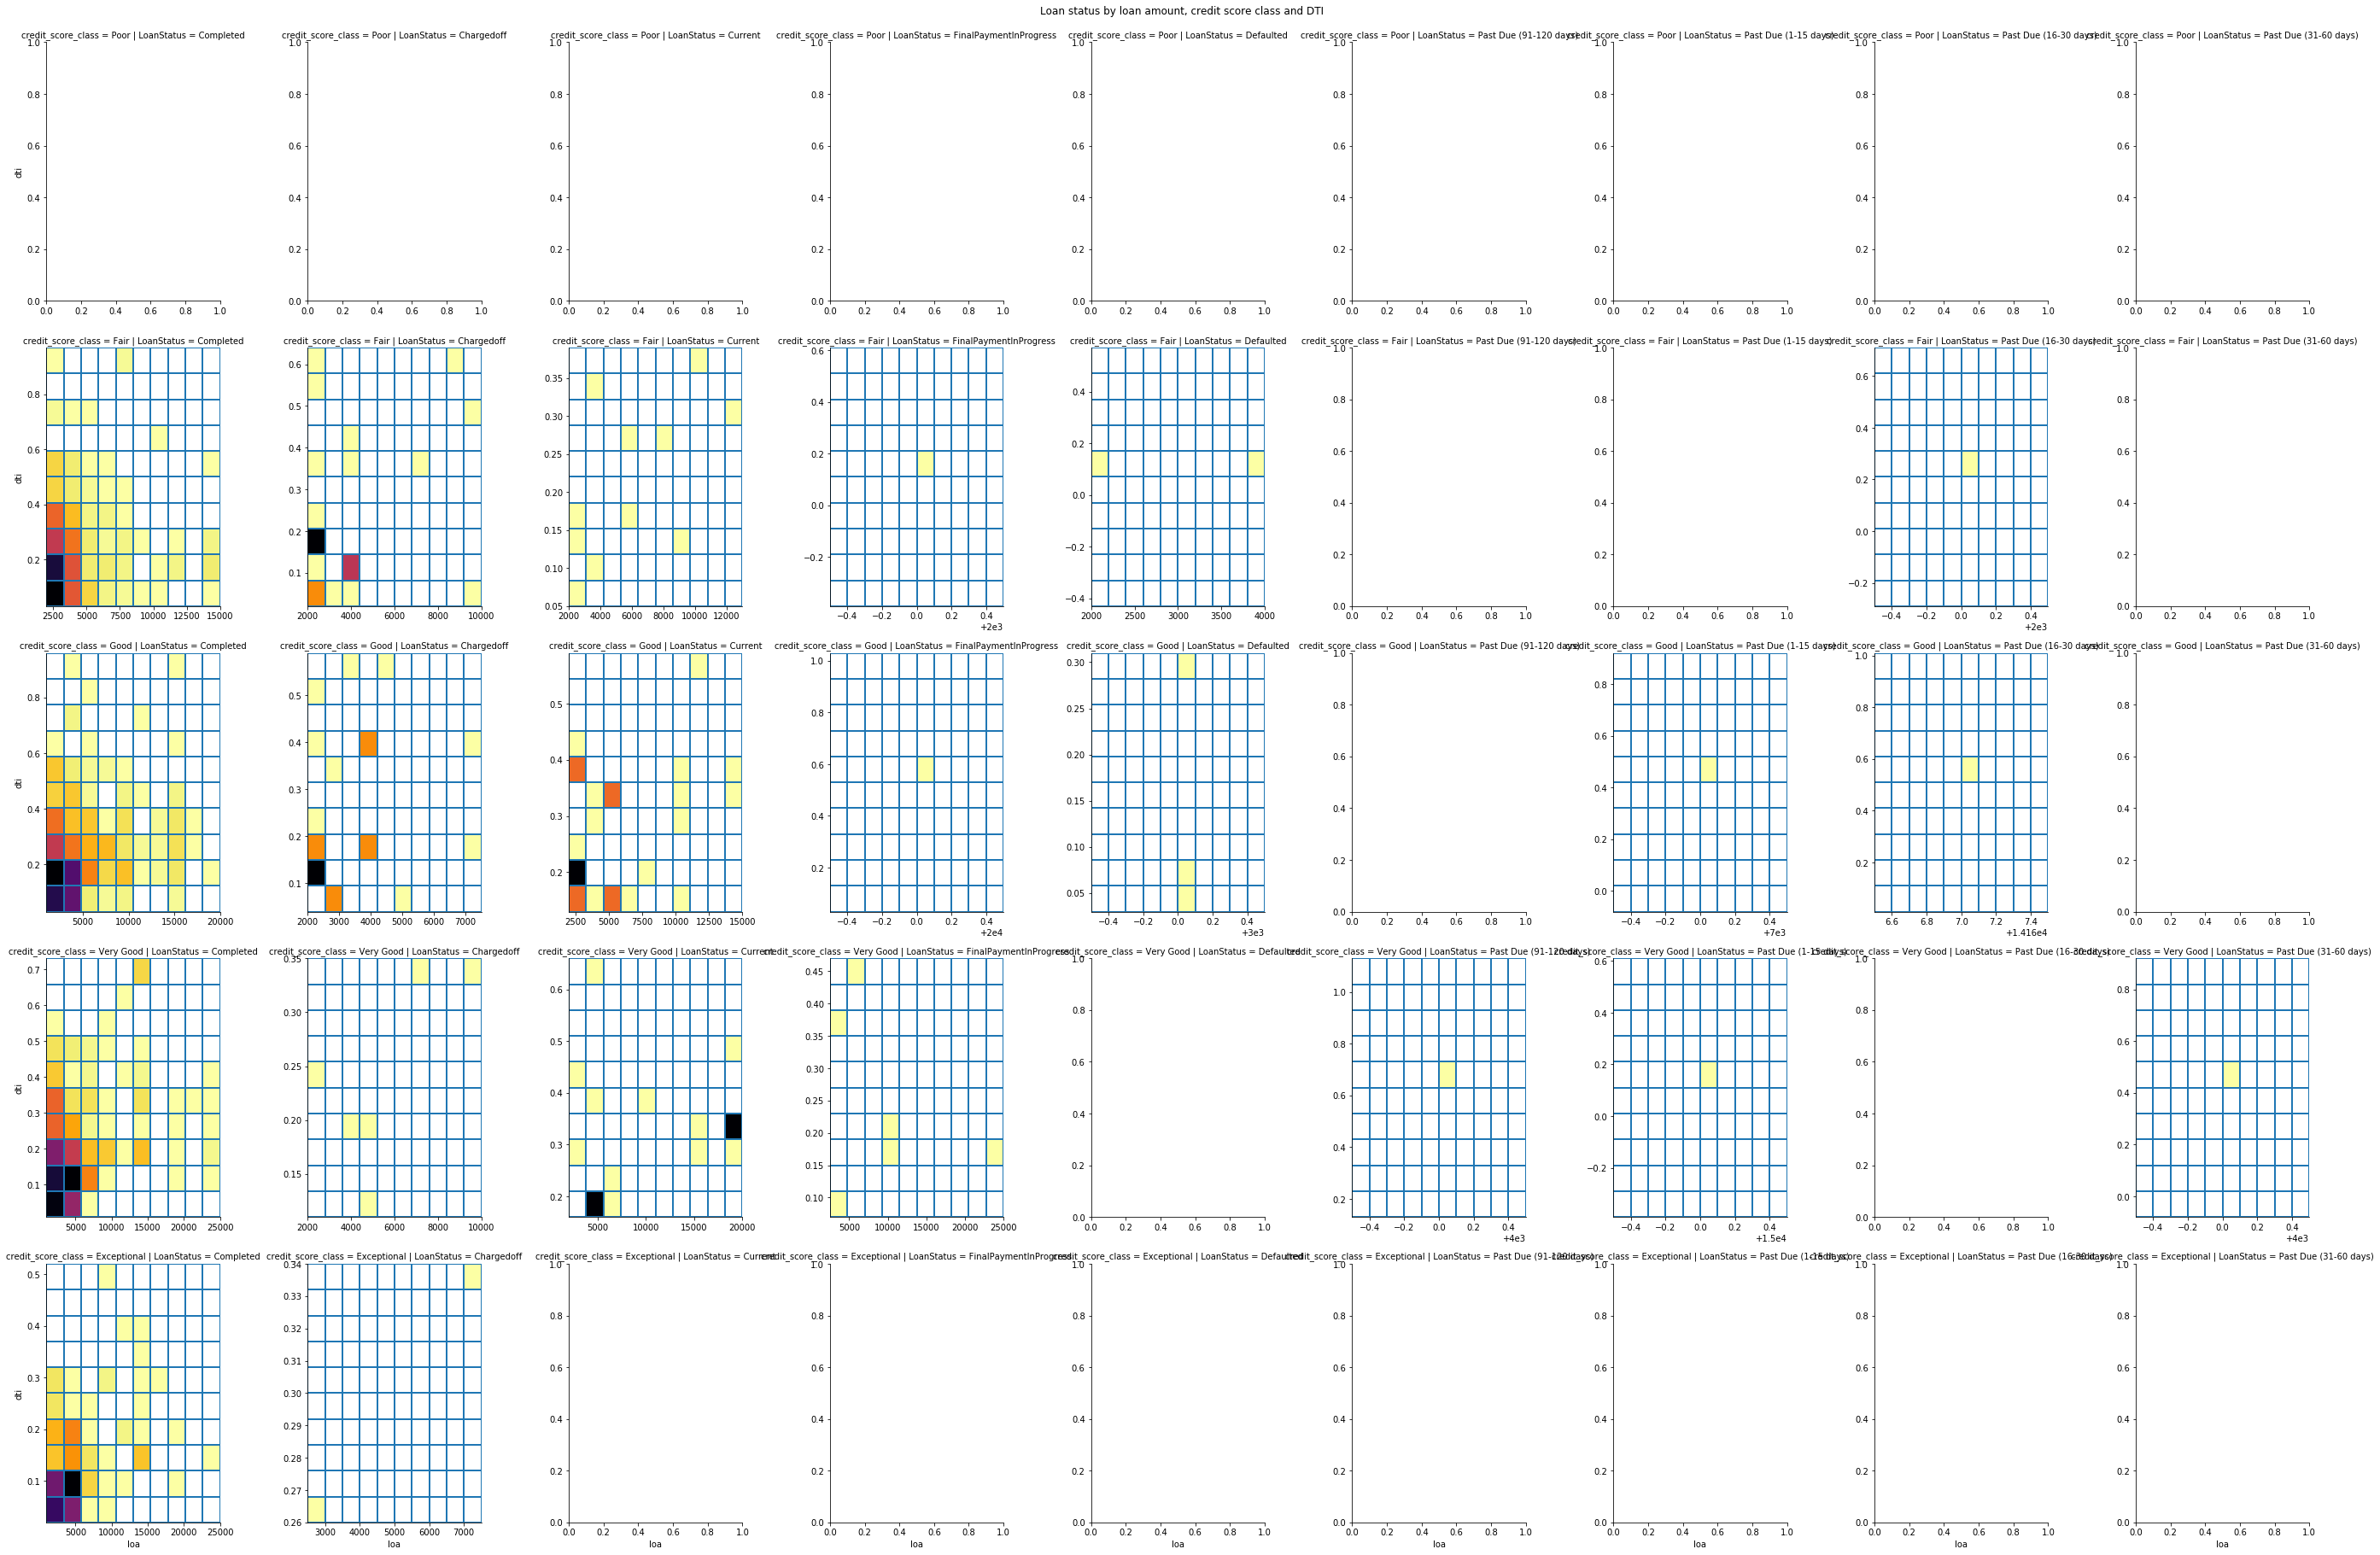

In [86]:
# Plotting heatmap for 'Term' = 12.
term12 = loan_df[loan_df['Term'] == 12]
g = sns.FacetGrid(data = term12, col = 'LoanStatus',row='credit_score_class', sharex = False,
                  sharey = False, height = 5, aspect = 0.85)
g.map(plt.hist2d,'LoanOriginalAmount','DebtToIncomeRatio',cmap = 'inferno_r', cmin = 0.5)
g.set_xlabels('loa')
g.set_ylabels('dti')
g.fig.suptitle('Loan status by loan amount, credit score class and DTI',y = 1.01)

plt.show()

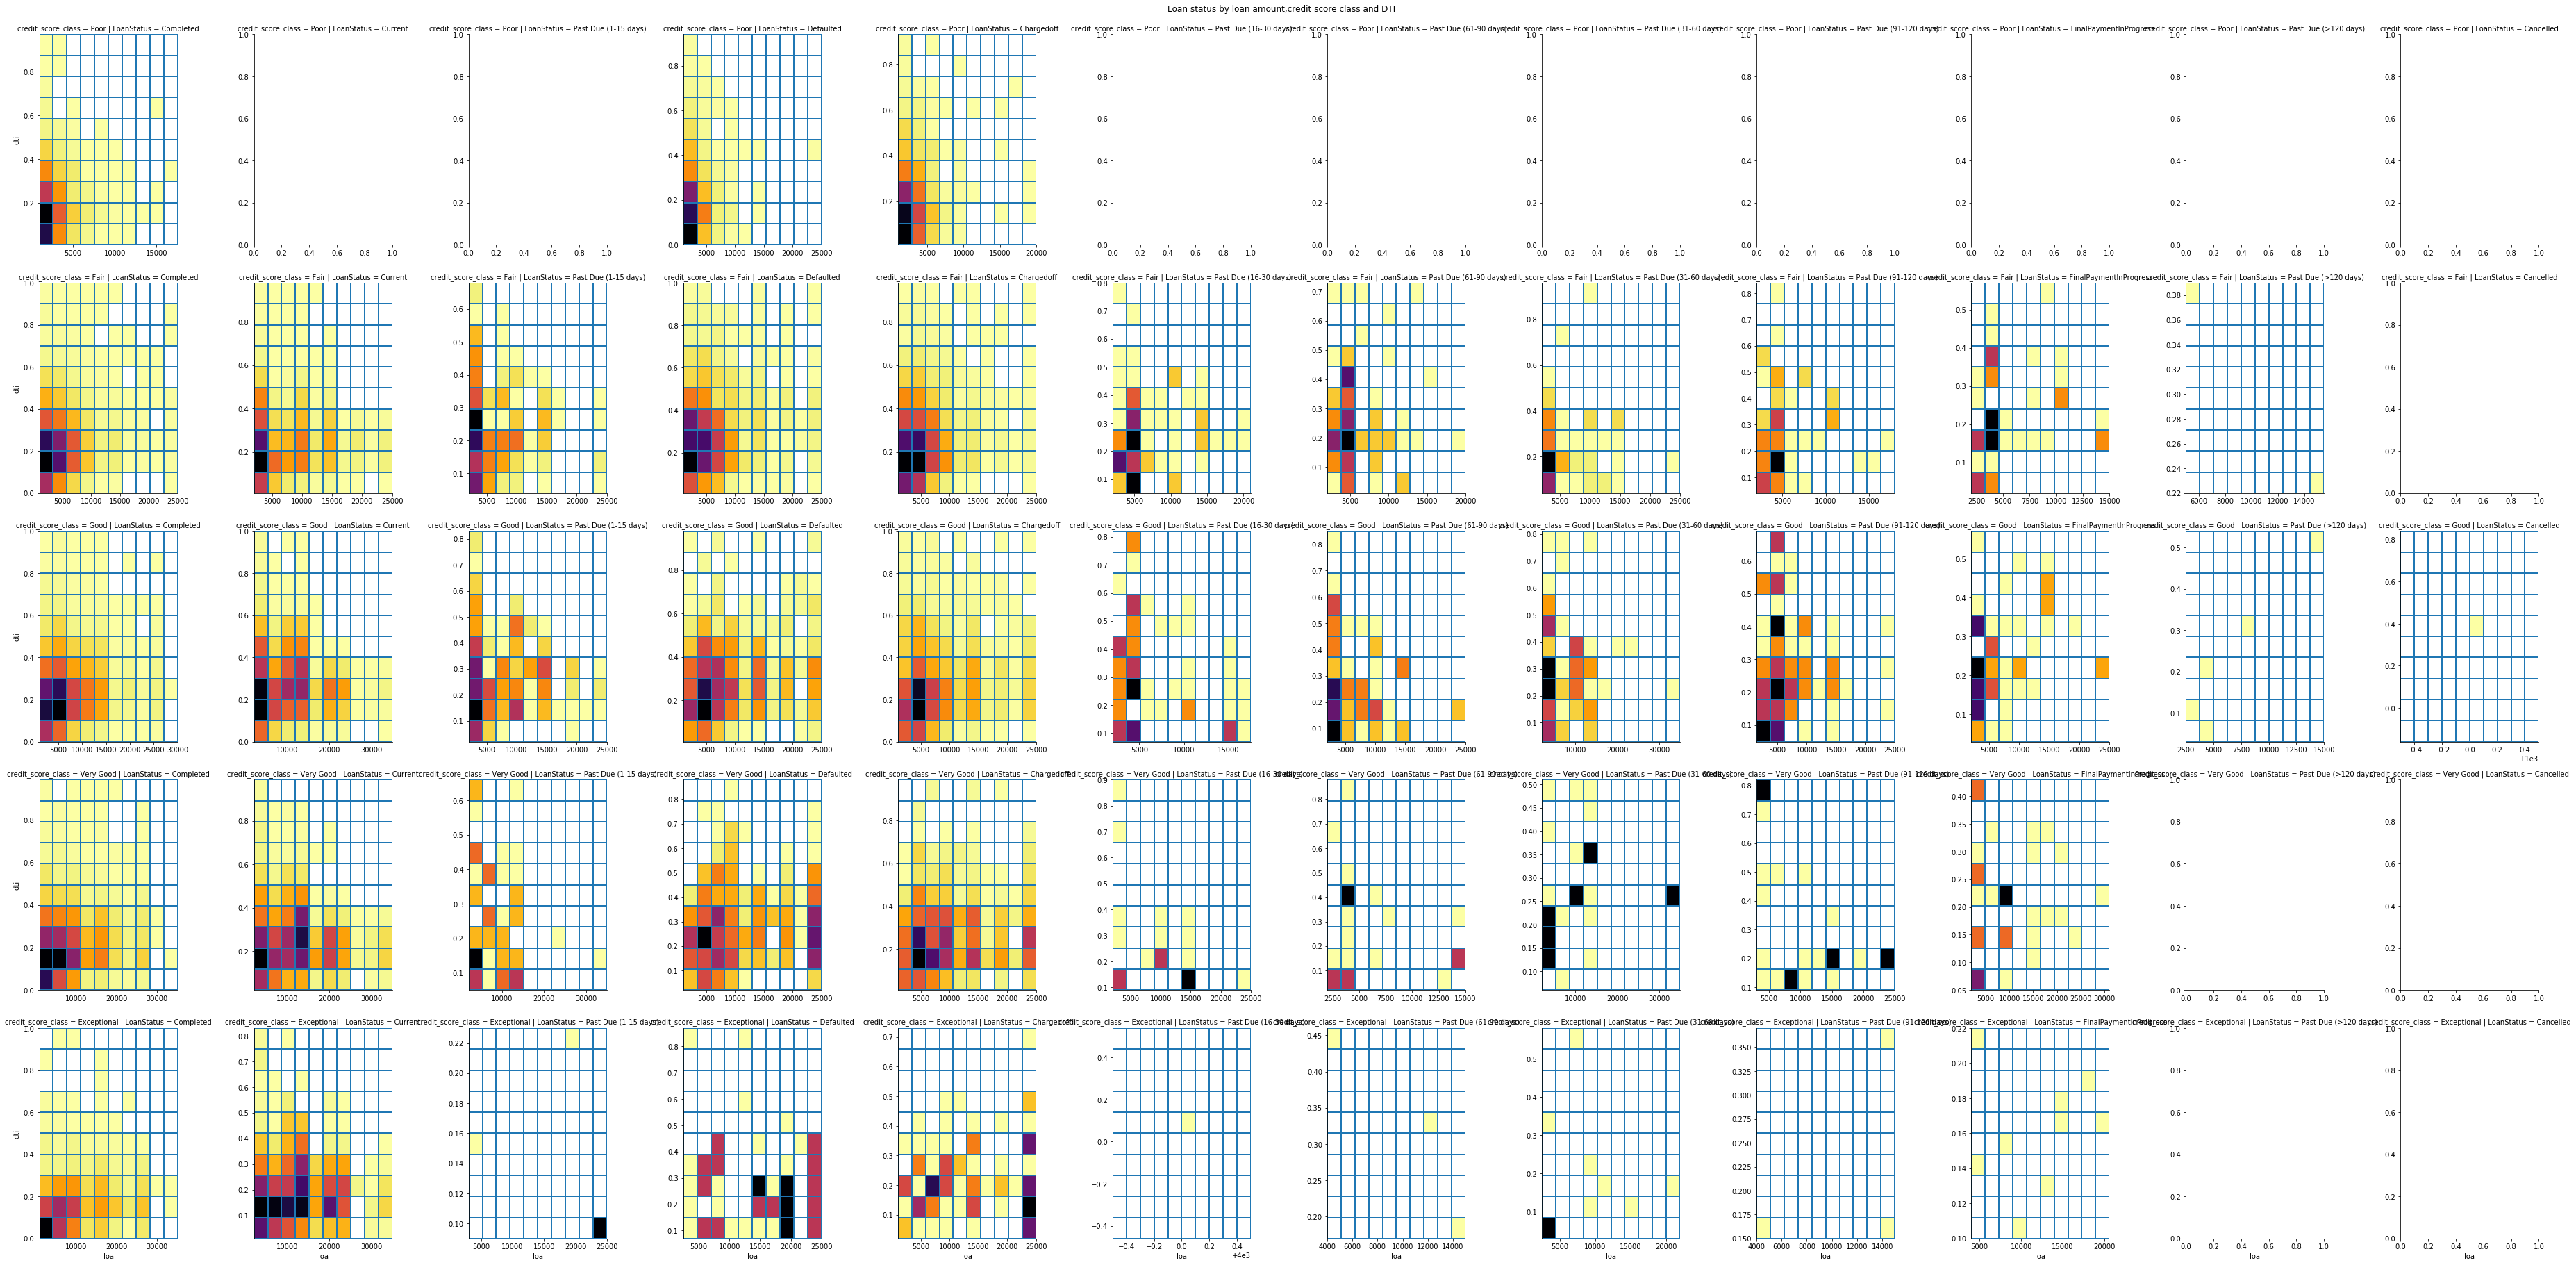

In [87]:
# Plotting heatmap for 'Term' = 36
term36 = loan_df[loan_df['Term'] == 36]
g = sns.FacetGrid(data = term36, col = 'LoanStatus',row = 'credit_score_class', 
                  sharex = False, sharey = False, height = 5, aspect = 0.85)
g.map(plt.hist2d,'LoanOriginalAmount','DebtToIncomeRatio',cmap = 'inferno_r', cmin = 0.5)
g.set_xlabels('loa')
g.set_ylabels('dti')
g.fig.suptitle('Loan status by loan amount,credit score class and DTI',y=1.01)

plt.show()

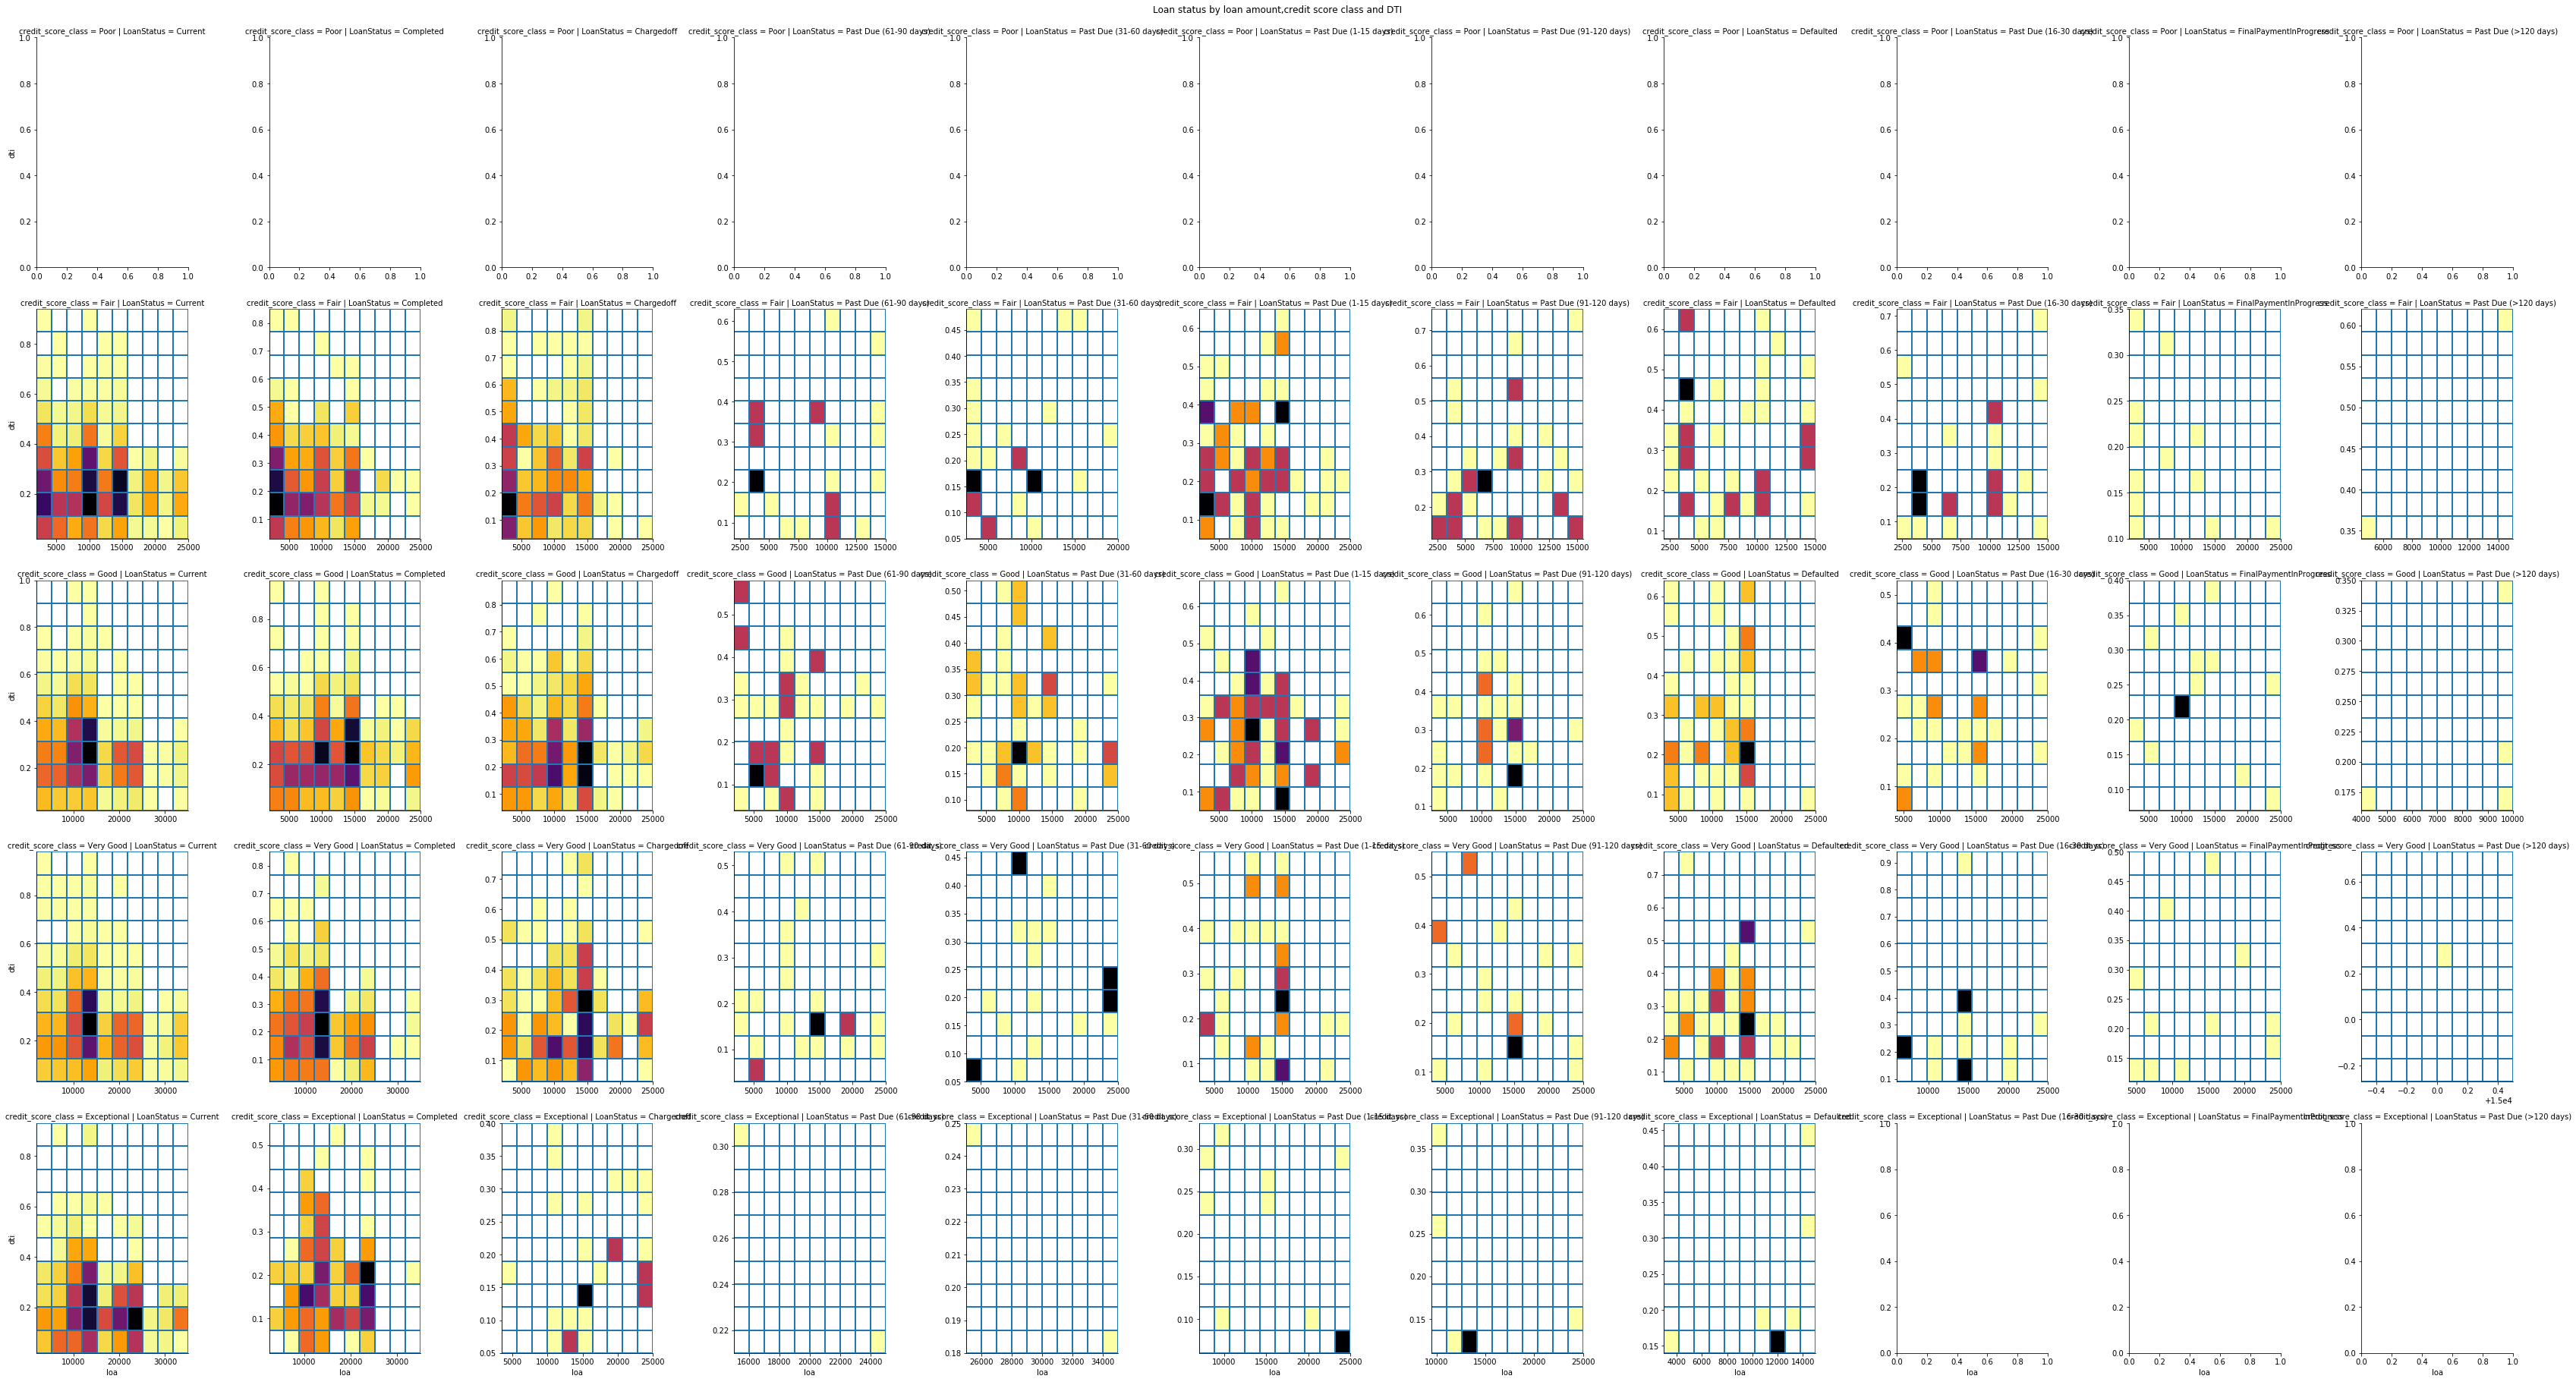

In [88]:
# Plotting heatmap for 'Term' = 60.
term60 = loan_df[loan_df['Term'] == 60]
g = sns.FacetGrid(data = term60, col = 'LoanStatus',row = 'credit_score_class',
                  sharex = False, sharey = False, height = 5, aspect = 0.85)
g.map(plt.hist2d,'LoanOriginalAmount','DebtToIncomeRatio',cmap = 'inferno_r', cmin = 0.5)
g.set_xlabels('loa')
g.set_ylabels('dti')
g.fig.suptitle('Loan status by loan amount,credit score class and DTI',y = 1.01)

plt.show()

I have made several observations:<br>
- For 'Term' = 12, loan status 'Complete' has maximum data points with most of the Borrower APR less than 0.2 between 1000 and 5000 loan amount. Also, loan status of 'current' and 'charged off' have some points with 'current' having 'cloud' of points above 0.2 debt to income ratio and 'chargedoff' having 'cloud' of points below 0.2 debt to income ratio. Rest of the loan status either have very few data or no data at all for term 12.<br>
- For 'Term' = 36, every loan status have some amount of data available with 'complete' having the maximum data for giving debt to income ratio and loan original amount. Also, I observed that loan status which have very less or no data available for term-12 are having some amount of data. This means that borrowers who took loan for 36 months term with debt to income ratio of greater than 0.2 are more likely to have loan status of 'past due', 'default', 'chargeoff'.<br>
- For 'Term' = 60, I observed that many borrowers have taken large amount compare to terms 12 and 36 and those who took loan between 10000-15000 are more likely to have high debt to income ratio.<br><br>
__Hence, loan amount,term,and debt to income ratio does play an important role in deciding the loan status.__

Explore **credit class**, **monthly income**, and **loan status**

Grouping data by credit score class,loan status and calculating mean of monthly income for each grouping variable.

In [89]:
mean_income = loan_df.groupby(['credit_score_class','LoanStatus'])['StatedMonthlyIncome'].mean()

In [90]:
mi = mean_income.reset_index()

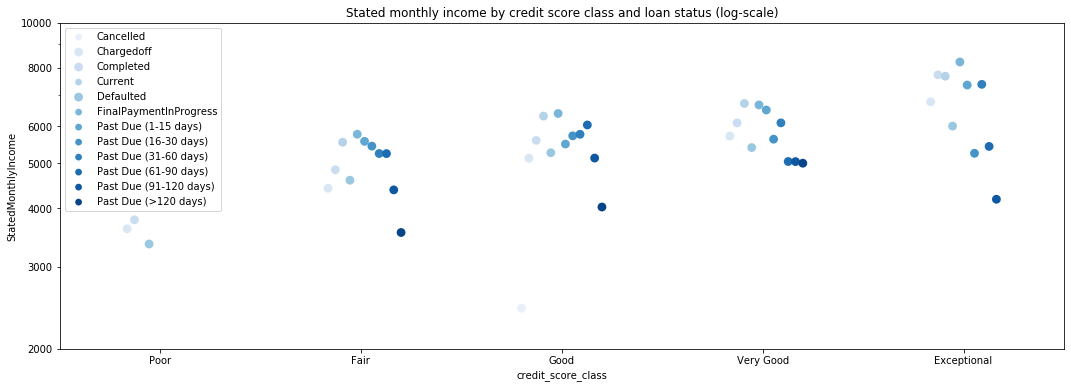

In [91]:
# Plotting pointplot by taking log transformation on y-axis.
fig = plt.figure(figsize = [18,6])
ax = sns.pointplot(data = mi, x = 'credit_score_class', y = 'StatedMonthlyIncome', hue = 'LoanStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4)

plt.yscale('log')
plt.yticks([2e3, 3e3, 4e3, 5e3, 6e3, 8e3, 10e3], 
           ['2000', '3000','4000','5000','6000','8000','10000'])

ax.set_yticklabels([],minor = True)
plt.legend(loc = 2)
plt.title('Stated monthly income by credit score class and loan status (log-scale)')
plt.show();

With loan status and change in credit score from **'Poor'** to **'Exceptional'** we can observe **increase** in stated monthly income. 

### Find the relationship between 'credit score class' and 'Borrower APR' and 'Borrower Rate'.

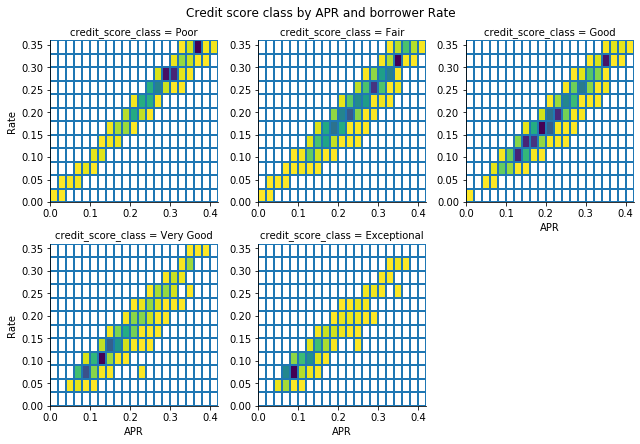

In [92]:
# Plotting heatmap using seaborn's facetgrid.
bins_x = np.arange(0, loan_df['BorrowerAPR'].max() + 0.01, 0.02)
bins_y = np.arange(0, loan_df['BorrowerRate'].max() + 0.01, 0.03)
g = sns.FacetGrid(data = loan_df, col = 'credit_score_class', 
                  sharex = False, sharey = False, col_wrap = 3, height = 3)
g.map(plt.hist2d, 'BorrowerAPR', 'BorrowerRate',bins = [bins_x,bins_y], cmap = 'viridis_r', cmin = 0.5)
g.set_xlabels('APR')
g.set_ylabels('Rate')
g.fig.suptitle('Credit score class by APR and borrower Rate',y = 1.02)

plt.show()

**Maximum** borrowers with credit score **'Good'**, **'Very Good'** and **'Exceptional'** had borrower APR and borrower Rate below 0.20.

### Find the relationship between 'Employment status' and 'Borrower APR' and 'Borrower Rate'.

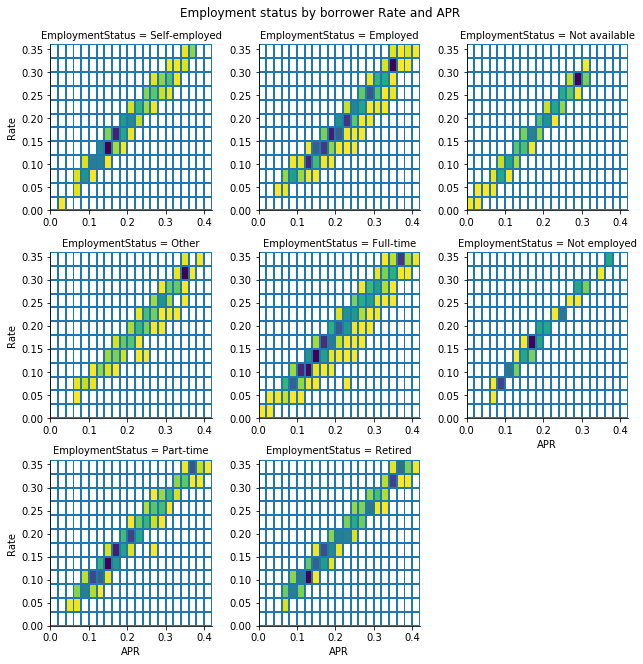

In [93]:
# Plotting heatmap using seaborn's facetgrid.
bins_x = np.arange(0,loan_df['BorrowerAPR'].max() + 0.01, 0.02)
bins_y = np.arange(0,loan_df['BorrowerRate'].max() + 0.01, 0.03)
g = sns.FacetGrid(data = loan_df, col = 'EmploymentStatus', 
                  sharex = False, sharey= False , col_wrap = 3, height = 3)
g.map(plt.hist2d, 'BorrowerAPR', 'BorrowerRate',bins = [bins_x,bins_y], cmap = 'viridis_r', cmin = 0.5)
g.set_xlabels('APR')
g.set_ylabels('Rate')
g.fig.suptitle('Employment status by borrower Rate and APR',y = 1.02)
plt.show()

### Find the relationship between 'credit score class' and 'loan original amount' and 'debt to income ratio'.

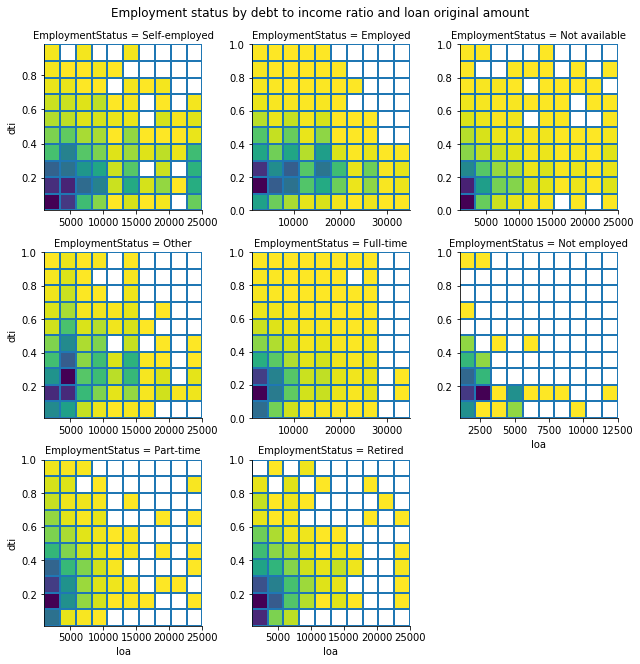

In [94]:
# Plotting heatmap using seaborn's facetgrid.
bins = (np.arange(0, 1 + 0.01, 0.02))**1/3
tick = [0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1]
labels = ['{}'.format(v)for v in tick]
bins_y = np.log10(np.arange(1000, loan_df['LoanOriginalAmount'].max()+ 40, 1500))
tick_y = []
g = sns.FacetGrid(data = loan_df, col = 'EmploymentStatus', sharex = False,
                  sharey = False, col_wrap = 3, height = 3)
g.map(plt.hist2d, 'LoanOriginalAmount', 'DebtToIncomeRatio', cmap = 'viridis_r', cmin = 0.5)
g.set_xlabels('loa')
g.set_ylabels('dti')
g.fig.suptitle('Employment status by debt to income ratio and loan original amount', y = 1.02)
plt.show()

Many borrowers having **'self employed'** as employment status, have had **loan original amount close to 25000.**<br>
Borrowers with **'not employed'** as employment staus are very less in our data and also most of them have **loan amount close to 2500** only with APR cloase to 0.20.